Pure Exploration Strategy

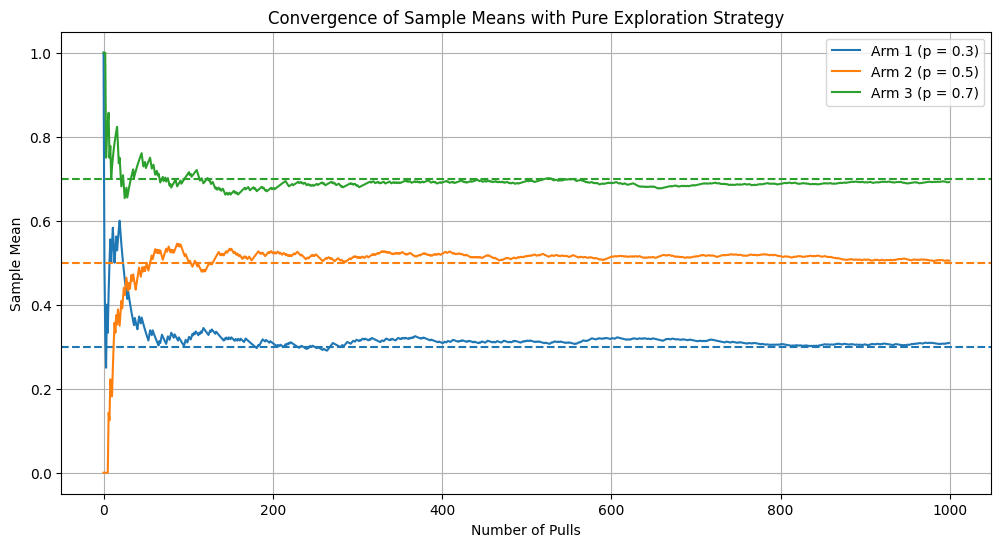

Minimum number of experiments required for Arm 1 to estimate the true probability with 95.0% confidence and 0.05 margin of error: 323
Minimum number of experiments required for Arm 2 to estimate the true probability with 95.0% confidence and 0.05 margin of error: 385
Minimum number of experiments required for Arm 3 to estimate the true probability with 95.0% confidence and 0.05 margin of error: 323


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Define the true probabilities of reward for each arm
true_probabilities = [0.3, 0.5, 0.7]

# Function to simulate pulling an arm
def pull_arm(arm):
    return np.random.rand() < true_probabilities[arm]

# Function to run pure exploration strategy
def pure_exploration_strategy(num_arms, num_pulls):
    rewards = np.zeros((num_pulls, num_arms))  # Rewards observed for each pull and arm

    # Continue pulling arms randomly
    for t in range(num_pulls):
        for arm in range(num_arms):
            reward = pull_arm(arm)
            rewards[t, arm] = reward

    return rewards

# Function to calculate the minimum number of experiments required
def calculate_required_experiments(true_probabilities, confidence_level=0.95, margin_of_error=0.05):
    Z = stats.norm.ppf(1 - (1 - confidence_level) / 2)  # Z-score for the desired confidence level
    required_experiments = []

    for p in true_probabilities:
        sigma = np.sqrt(p * (1 - p))  # Standard deviation of the Bernoulli distribution
        n = (Z * sigma / margin_of_error) ** 2
        required_experiments.append(int(np.ceil(n)))

    return required_experiments

# Parameters
confidence_level = 0.95
margin_of_error = 0.05
num_pulls = 1000
num_arms = len(true_probabilities)

# Run pure exploration strategy
rewards = pure_exploration_strategy(num_arms, num_pulls)

# Calculate sample means
sample_means = np.cumsum(rewards, axis=0) / (np.arange(1, num_pulls + 1)[:, None])

# Calculate required experiments
required_experiments = calculate_required_experiments(true_probabilities, confidence_level, margin_of_error)

# Plot sample means and true probabilities
plt.figure(figsize=(12, 6))
for arm in range(num_arms):
    plt.plot(sample_means[:, arm], label=f'Arm {arm + 1} (p = {true_probabilities[arm]})')
    plt.axhline(true_probabilities[arm], linestyle='--', color=f'C{arm}')

plt.xlabel('Number of Pulls')
plt.ylabel('Sample Mean')
plt.title('Convergence of Sample Means with Pure Exploration Strategy')
plt.legend()
plt.grid()
plt.show()

# Display required experiments
for arm, n in enumerate(required_experiments):
    print(f'Minimum number of experiments required for Arm {arm + 1} to estimate the true probability with {confidence_level * 100}% confidence and {margin_of_error} margin of error: {n}')


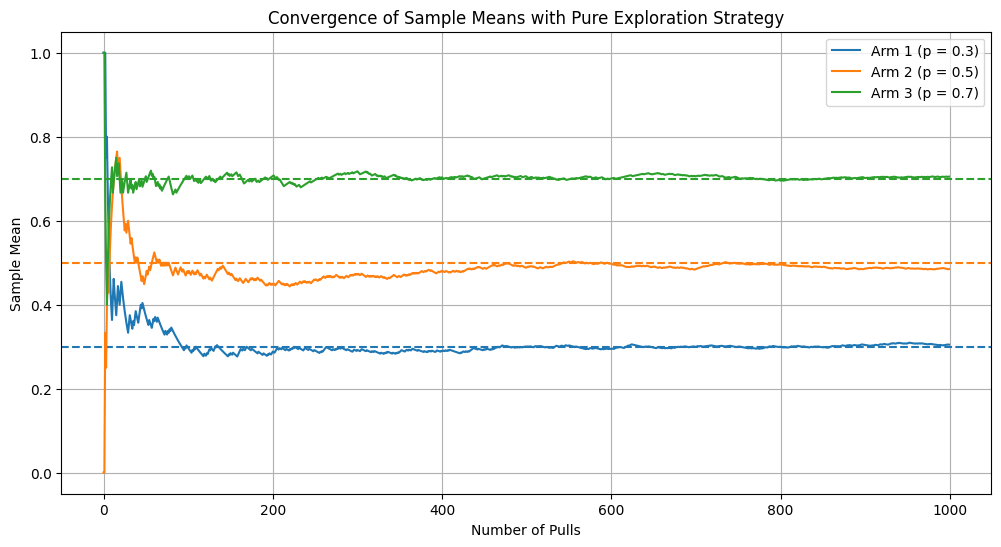

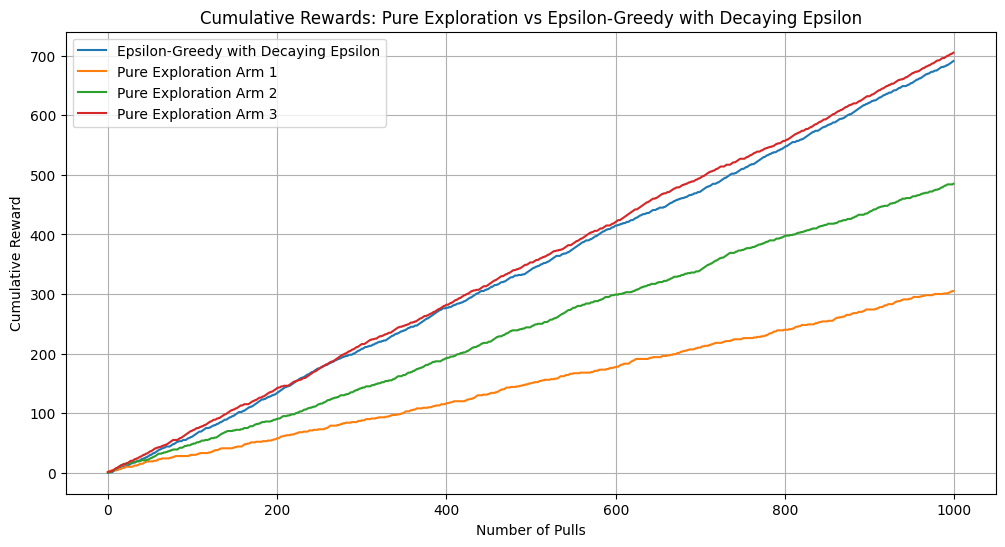

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Define the true probabilities of reward for each arm
true_probabilities = [0.3, 0.5, 0.7]

# Function to simulate pulling an arm
def pull_arm(arm):
    return np.random.rand() < true_probabilities[arm]

# Pure exploration strategy (epsilon = 1)
def pure_exploration_strategy(num_arms, num_pulls):
    rewards = np.zeros((num_pulls, num_arms))  # Rewards observed for each pull and arm

    # Continue pulling arms randomly
    for t in range(num_pulls):
        for arm in range(num_arms):
            reward = pull_arm(arm)
            rewards[t, arm] = reward

    return rewards

# Epsilon-greedy strategy with decaying epsilon
def epsilon_greedy_strategy_with_decaying_epsilon(num_arms, num_pulls, initial_epsilon=1.0, min_epsilon=0.1, decay_rate=0.001):
    estimated_values = np.zeros(num_arms)  # Estimated values of each arm
    num_times_pulled = np.zeros(num_arms)  # Number of times each arm has been pulled
    rewards = []  # Log of rewards
    epsilon = initial_epsilon

    # Initial exploration: pull each arm once
    for arm in range(num_arms):
        reward = pull_arm(arm)
        estimated_values[arm] = reward
        num_times_pulled[arm] = 1
        rewards.append(reward)

    # Continue pulling arms based on epsilon-greedy strategy
    for t in range(num_pulls - num_arms):
        # Decide whether to explore or exploit
        if np.random.rand() < epsilon:
            chosen_arm = np.random.choice(num_arms)  # Explore: choose a random arm
        else:
            chosen_arm = np.argmax(estimated_values)  # Exploit: choose the best arm

        reward = pull_arm(chosen_arm)
        rewards.append(reward)

        # Update the estimated value of the selected arm
        num_times_pulled[chosen_arm] += 1
        estimated_values[chosen_arm] += (reward - estimated_values[chosen_arm]) / num_times_pulled[chosen_arm]

        # Decay epsilon
        epsilon = max(min_epsilon, epsilon * np.exp(-decay_rate * t))

    return estimated_values, num_times_pulled, rewards

# Parameters
num_pulls = 1000
num_experiments = 500
num_arms = len(true_probabilities)

# Run pure exploration strategy
exploration_rewards = pure_exploration_strategy(num_arms, num_pulls)

# Calculate sample means
sample_means = np.cumsum(exploration_rewards, axis=0) / (np.arange(1, num_pulls + 1)[:, None])

# Run epsilon-greedy strategy with decaying epsilon
_, _, epsilon_greedy_rewards = epsilon_greedy_strategy_with_decaying_epsilon(num_arms, num_pulls)

# Calculate cumulative rewards
cumulative_rewards_exploration = np.cumsum(exploration_rewards, axis=0)
cumulative_rewards_epsilon_greedy = np.cumsum(epsilon_greedy_rewards)

# Plot sample means and true probabilities
plt.figure(figsize=(12, 6))
for arm in range(num_arms):
    plt.plot(sample_means[:, arm], label=f'Arm {arm + 1} (p = {true_probabilities[arm]})')
    plt.axhline(true_probabilities[arm], linestyle='--', color=f'C{arm}')

plt.xlabel('Number of Pulls')
plt.ylabel('Sample Mean')
plt.title('Convergence of Sample Means with Pure Exploration Strategy')
plt.legend()
plt.grid()
plt.show()

# Plot cumulative rewards for both strategies
plt.figure(figsize=(12, 6))
plt.plot(cumulative_rewards_epsilon_greedy, label='Epsilon-Greedy with Decaying Epsilon')
for arm in range(num_arms):
    plt.plot(cumulative_rewards_exploration[:, arm], label=f'Pure Exploration Arm {arm + 1}')

plt.xlabel('Number of Pulls')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Rewards: Pure Exploration vs Epsilon-Greedy with Decaying Epsilon')
plt.legend()
plt.grid()
plt.show()


UCB

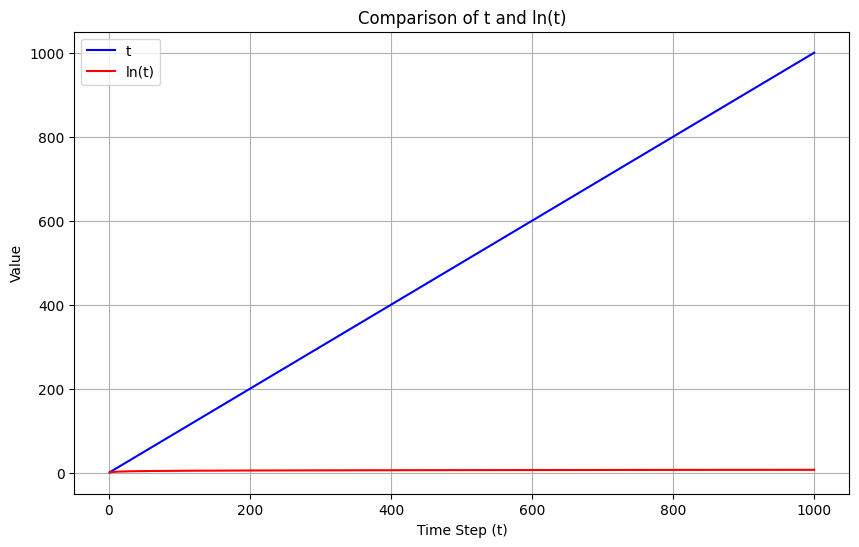

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate time steps
t_values = np.arange(1, 1001)
ln_t_values = np.log(t_values)

# Plot t and ln(t)
plt.figure(figsize=(10, 6))
plt.plot(t_values, t_values, label='t', color='blue')
plt.plot(t_values, ln_t_values, label='ln(t)', color='red')

plt.xlabel('Time Step (t)')
plt.ylabel('Value')
plt.title('Comparison of t and ln(t)')
plt.legend()
plt.grid()
plt.show()


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the probabilities of reward for each arm
true_probabilities = [0.3, 0.5, 0.7]

# Function to simulate pulling an arm
def pull_arm(arm):
    return np.random.rand() < true_probabilities[arm]

# UCB strategy function with logging
def ucb_strategy_with_logging(num_arms, num_pulls, c=2):
    estimated_values = np.zeros(num_arms)  # Estimated values of each arm
    num_times_pulled = np.zeros(num_arms)  # Number of times each arm has been pulled
    transitions = []  # Log of transitions (selected arm and reward)

    # Initial exploration: pull each arm once
    for arm in range(num_arms):
        reward = pull_arm(arm)
        estimated_values[arm] = reward
        num_times_pulled[arm] = 1
        transitions.append((arm, reward, estimated_values.copy(), num_times_pulled.copy()))
        print(f"Round {arm+1}: Selected Arm = {arm}, Reward = {reward}")
        print(f"Estimated Values: {estimated_values}")
        print(f"Number of Times Each Arm Was Pulled: {num_times_pulled}\n")

    # Continue pulling arms based on UCB strategy
    for t in range(num_pulls - num_arms):
        ucb_values = estimated_values + c * np.sqrt(np.log(t + 1) / num_times_pulled)
        best_arm = np.argmax(ucb_values)
        reward = pull_arm(best_arm)
        num_times_pulled[best_arm] += 1
        estimated_values[best_arm] += (reward - estimated_values[best_arm]) / num_times_pulled[best_arm]
        transitions.append((best_arm, reward, estimated_values.copy(), num_times_pulled.copy()))
        print(f"Round {t+num_arms+1}: Selected Arm = {best_arm}, Reward = {reward}")
        print(f"Estimated Values: {estimated_values}")
        print(f"Number of Times Each Arm Was Pulled: {num_times_pulled}\n")

    return estimated_values, num_times_pulled, transitions

# Run a single experiment to see the detailed output
num_arms = len(true_probabilities)
num_pulls = 50  # Reduced for clarity

print("UCB Strategy:\n")
ucb_estimated_values, ucb_num_times_pulled, ucb_transitions = ucb_strategy_with_logging(num_arms, num_pulls)
print("Final Estimated Values:", ucb_estimated_values)
print("Final Number of Times Each Arm Was Pulled:", ucb_num_times_pulled)


UCB Strategy:

Round 1: Selected Arm = 0, Reward = False
Estimated Values: [0. 0. 0.]
Number of Times Each Arm Was Pulled: [1. 0. 0.]

Round 2: Selected Arm = 1, Reward = True
Estimated Values: [0. 1. 0.]
Number of Times Each Arm Was Pulled: [1. 1. 0.]

Round 3: Selected Arm = 2, Reward = False
Estimated Values: [0. 1. 0.]
Number of Times Each Arm Was Pulled: [1. 1. 1.]

Round 4: Selected Arm = 1, Reward = False
Estimated Values: [0.  0.5 0. ]
Number of Times Each Arm Was Pulled: [1. 2. 1.]

Round 5: Selected Arm = 1, Reward = True
Estimated Values: [0.         0.66666667 0.        ]
Number of Times Each Arm Was Pulled: [1. 3. 1.]

Round 6: Selected Arm = 0, Reward = False
Estimated Values: [0.         0.66666667 0.        ]
Number of Times Each Arm Was Pulled: [2. 3. 1.]

Round 7: Selected Arm = 2, Reward = False
Estimated Values: [0.         0.66666667 0.        ]
Number of Times Each Arm Was Pulled: [2. 3. 2.]

Round 8: Selected Arm = 1, Reward = True
Estimated Values: [0.   0.75 0.

UCB-2

UCB Strategy:

Round 1: Selected Arm = 0, Reward = True
Estimated Values: [1. 0. 0.]
Number of Times Each Arm Was Pulled: [1. 0. 0.]

Round 2: Selected Arm = 1, Reward = False
Estimated Values: [1. 0. 0.]
Number of Times Each Arm Was Pulled: [1. 1. 0.]

Round 3: Selected Arm = 2, Reward = True
Estimated Values: [1. 0. 1.]
Number of Times Each Arm Was Pulled: [1. 1. 1.]

Round 4: Selected Arm = 0, Reward = False
Estimated Values: [0.5 0.  1. ]
Number of Times Each Arm Was Pulled: [2. 1. 1.]

Round 5: Selected Arm = 2, Reward = True
Estimated Values: [0.5 0.  1. ]
Number of Times Each Arm Was Pulled: [2. 1. 2.]

Round 6: Selected Arm = 2, Reward = True
Estimated Values: [0.5 0.  1. ]
Number of Times Each Arm Was Pulled: [2. 1. 3.]

Round 7: Selected Arm = 1, Reward = False
Estimated Values: [0.5 0.  1. ]
Number of Times Each Arm Was Pulled: [2. 2. 3.]

Round 8: Selected Arm = 2, Reward = True
Estimated Values: [0.5 0.  1. ]
Number of Times Each Arm Was Pulled: [2. 2. 4.]

Round 9: Select

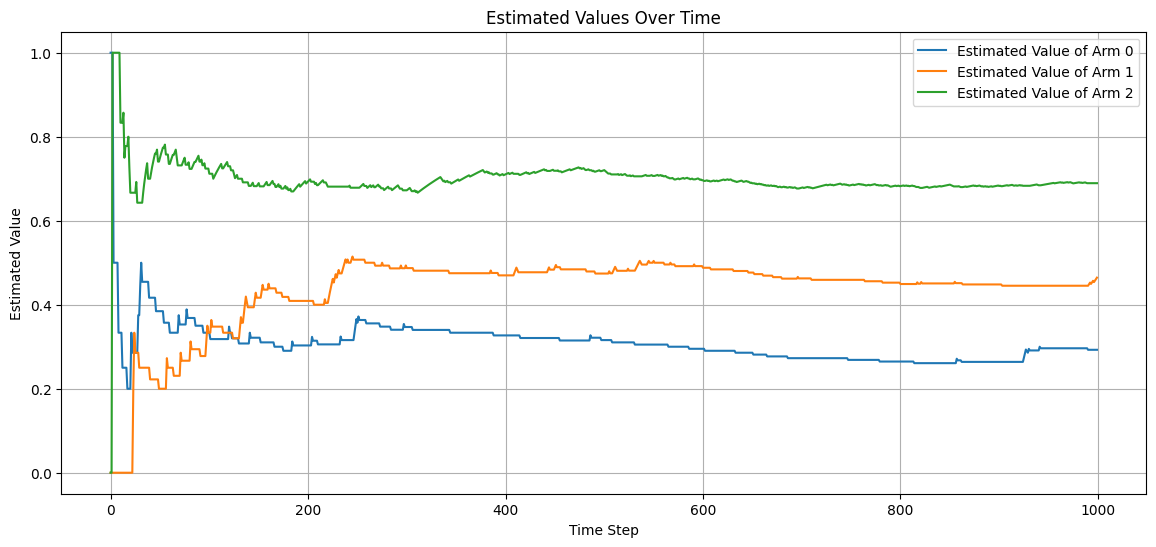

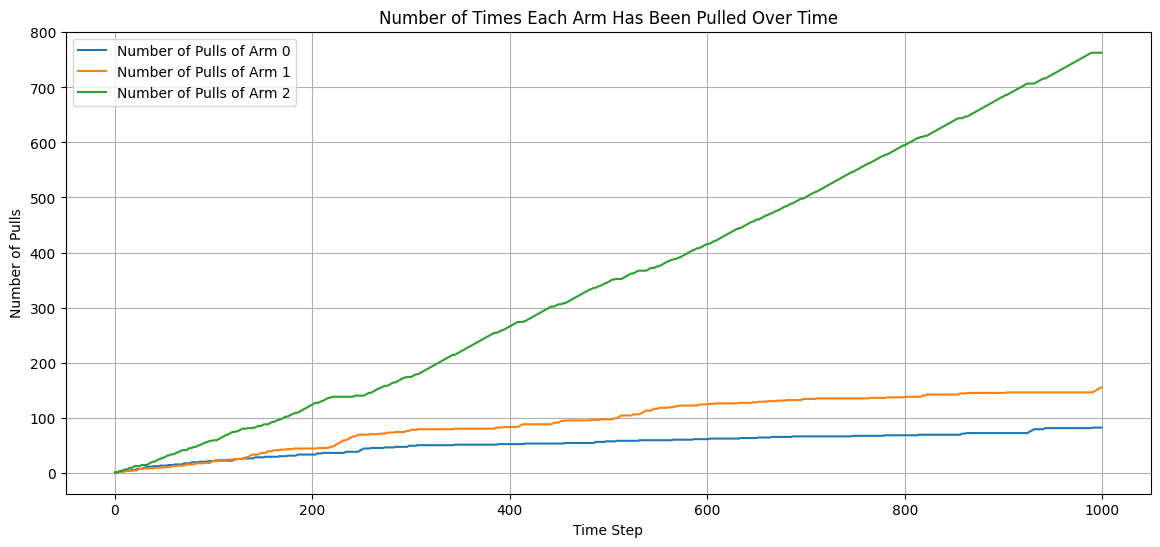

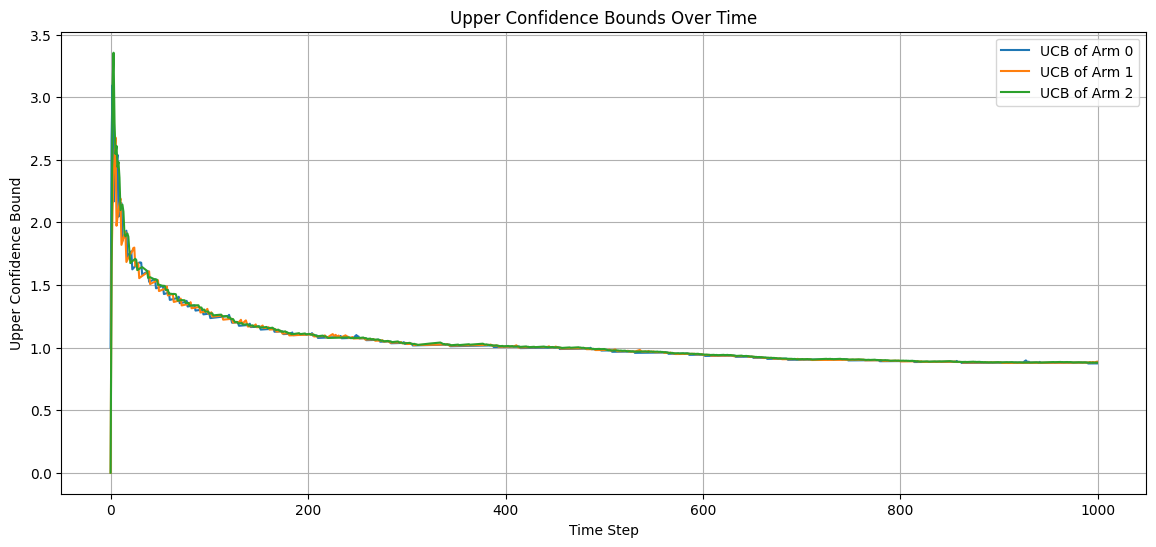

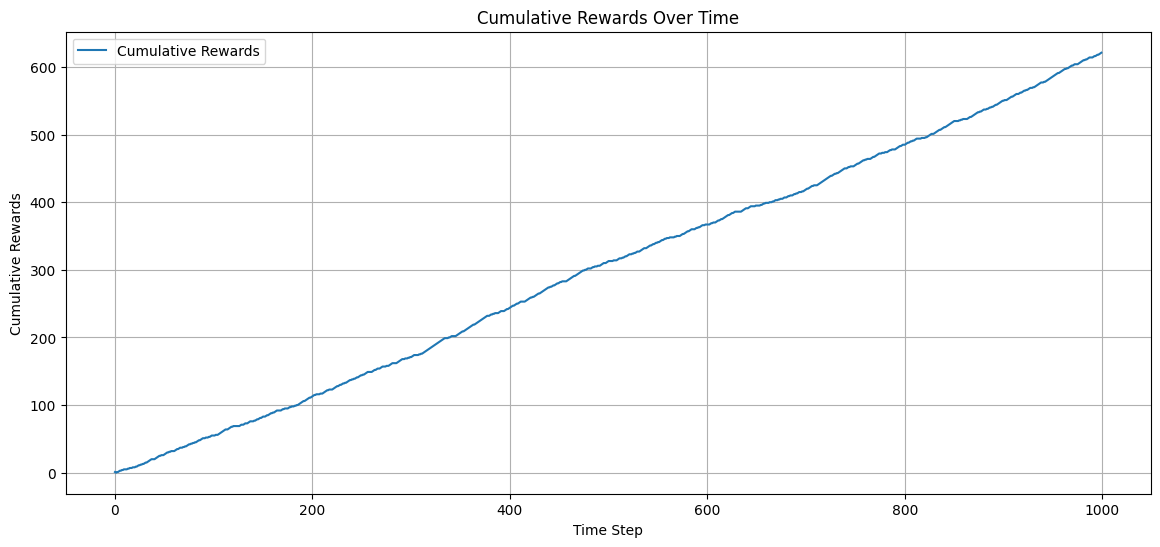

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the probabilities of reward for each arm
true_probabilities = [0.3, 0.5, 0.7]

# Function to simulate pulling an arm
def pull_arm(arm):
    return np.random.rand() < true_probabilities[arm]

# UCB strategy function with logging and plotting
def ucb_strategy_with_logging_and_plotting(num_arms, num_pulls, c=2):
    estimated_values = np.zeros(num_arms)  # Estimated values of each arm
    num_times_pulled = np.zeros(num_arms)  # Number of times each arm has been pulled
    total_rewards = np.zeros(num_pulls)  # Total rewards at each step
    transitions = []  # Log of transitions (selected arm and reward)

    # Initial exploration: pull each arm once
    for arm in range(num_arms):
        reward = pull_arm(arm)
        estimated_values[arm] = reward
        num_times_pulled[arm] = 1
        total_rewards[arm] = reward
        transitions.append((arm, reward, estimated_values.copy(), num_times_pulled.copy()))
        print(f"Round {arm+1}: Selected Arm = {arm}, Reward = {reward}")
        print(f"Estimated Values: {estimated_values}")
        print(f"Number of Times Each Arm Was Pulled: {num_times_pulled}\n")

    # Continue pulling arms based on UCB strategy
    for t in range(num_arms, num_pulls):
        ucb_values = estimated_values + c * np.sqrt(np.log(t + 1) / num_times_pulled)
        best_arm = np.argmax(ucb_values)
        reward = pull_arm(best_arm)
        num_times_pulled[best_arm] += 1
        estimated_values[best_arm] += (reward - estimated_values[best_arm]) / num_times_pulled[best_arm]
        total_rewards[t] = total_rewards[t - 1] + reward
        transitions.append((best_arm, reward, estimated_values.copy(), num_times_pulled.copy()))
        print(f"Round {t+1}: Selected Arm = {best_arm}, Reward = {reward}")
        print(f"Estimated Values: {estimated_values}")
        print(f"Number of Times Each Arm Was Pulled: {num_times_pulled}\n")

    return estimated_values, num_times_pulled, total_rewards, transitions

# Run a single experiment to see the detailed output
num_arms = len(true_probabilities)
num_pulls = 1000  # Increased for better visualization of trends

print("UCB Strategy:\n")
ucb_estimated_values, ucb_num_times_pulled, ucb_total_rewards, ucb_transitions = ucb_strategy_with_logging_and_plotting(num_arms, num_pulls)
print("Final Estimated Values:", ucb_estimated_values)
print("Final Number of Times Each Arm Was Pulled:", ucb_num_times_pulled)

# Extract data for plotting
times = np.arange(num_pulls)
estimated_values_over_time = np.array([transition[2] for transition in ucb_transitions])
num_times_pulled_over_time = np.array([transition[3] for transition in ucb_transitions])
ucb_values_over_time = estimated_values_over_time + 2 * np.sqrt(np.log(times[:, None] + 1) / np.maximum(1, num_times_pulled_over_time))

# Plot the estimated values over time
plt.figure(figsize=(14, 6))
for arm in range(num_arms):
    plt.plot(times, estimated_values_over_time[:, arm], label=f'Estimated Value of Arm {arm}')
plt.xlabel('Time Step')
plt.ylabel('Estimated Value')
plt.title('Estimated Values Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Plot the number of times each arm has been pulled over time
plt.figure(figsize=(14, 6))
for arm in range(num_arms):
    plt.plot(times, num_times_pulled_over_time[:, arm], label=f'Number of Pulls of Arm {arm}')
plt.xlabel('Time Step')
plt.ylabel('Number of Pulls')
plt.title('Number of Times Each Arm Has Been Pulled Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Plot the upper confidence bounds over time
plt.figure(figsize=(14, 6))
for arm in range(num_arms):
    plt.plot(times, ucb_values_over_time[:, arm], label=f'UCB of Arm {arm}')
plt.xlabel('Time Step')
plt.ylabel('Upper Confidence Bound')
plt.title('Upper Confidence Bounds Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Plot the cumulative rewards over time
plt.figure(figsize=(14, 6))
plt.plot(times, ucb_total_rewards, label='Cumulative Rewards')
plt.xlabel('Time Step')
plt.ylabel('Cumulative Rewards')
plt.title('Cumulative Rewards Over Time')
plt.legend()
plt.grid(True)
plt.show()


UCB Strategy:

Round 1: Selected Arm = 0, Reward = False, Mode = Exploration
Estimated Values: [0. 0. 0.]
Number of Times Each Arm Was Pulled: [1. 0. 0.]

Round 2: Selected Arm = 1, Reward = True, Mode = Exploration
Estimated Values: [0. 1. 0.]
Number of Times Each Arm Was Pulled: [1. 1. 0.]

Round 3: Selected Arm = 2, Reward = True, Mode = Exploration
Estimated Values: [0. 1. 1.]
Number of Times Each Arm Was Pulled: [1. 1. 1.]

Round 4: Selected Arm = 1, Reward = True, Mode = Exploitation
Estimated Values: [0. 1. 1.]
Number of Times Each Arm Was Pulled: [1. 2. 1.]

Round 5: Selected Arm = 2, Reward = True, Mode = Exploration
Estimated Values: [0. 1. 1.]
Number of Times Each Arm Was Pulled: [1. 2. 2.]

Round 6: Selected Arm = 1, Reward = True, Mode = Exploitation
Estimated Values: [0. 1. 1.]
Number of Times Each Arm Was Pulled: [1. 3. 2.]

Round 7: Selected Arm = 2, Reward = True, Mode = Exploration
Estimated Values: [0. 1. 1.]
Number of Times Each Arm Was Pulled: [1. 3. 3.]

Round 8: 

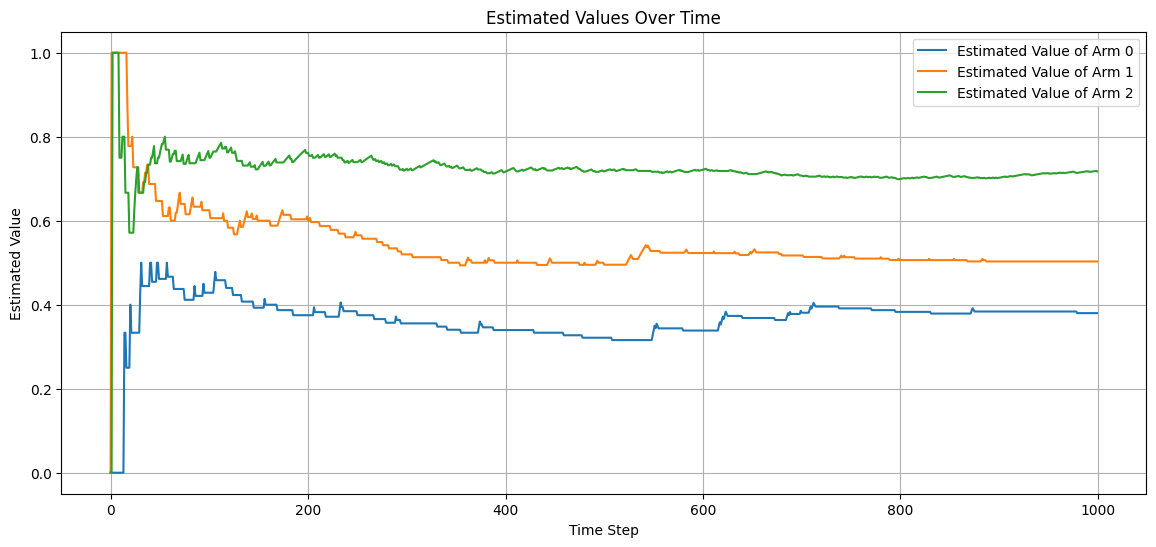

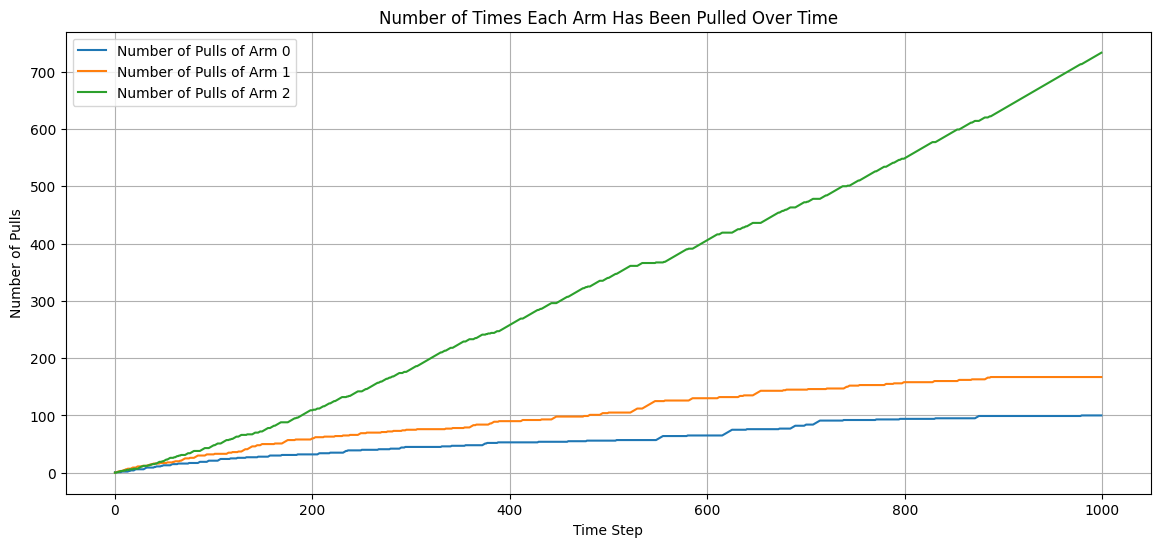

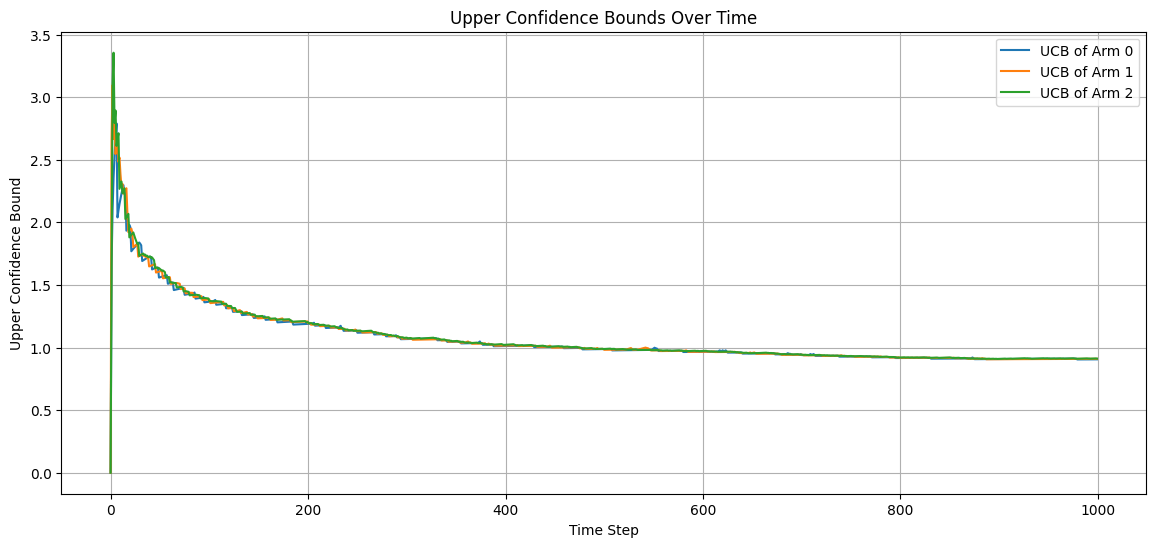

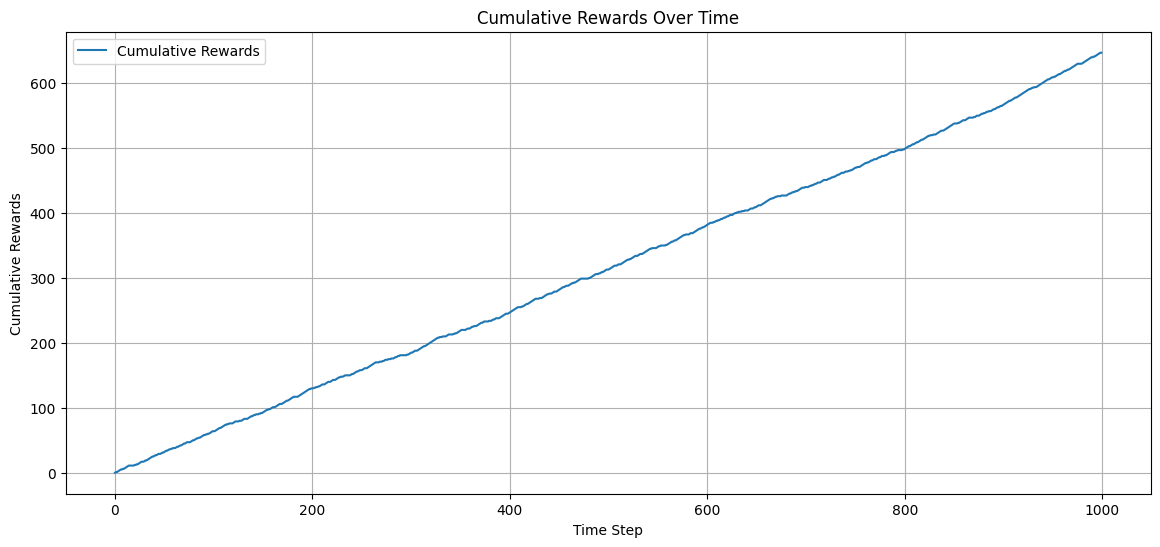

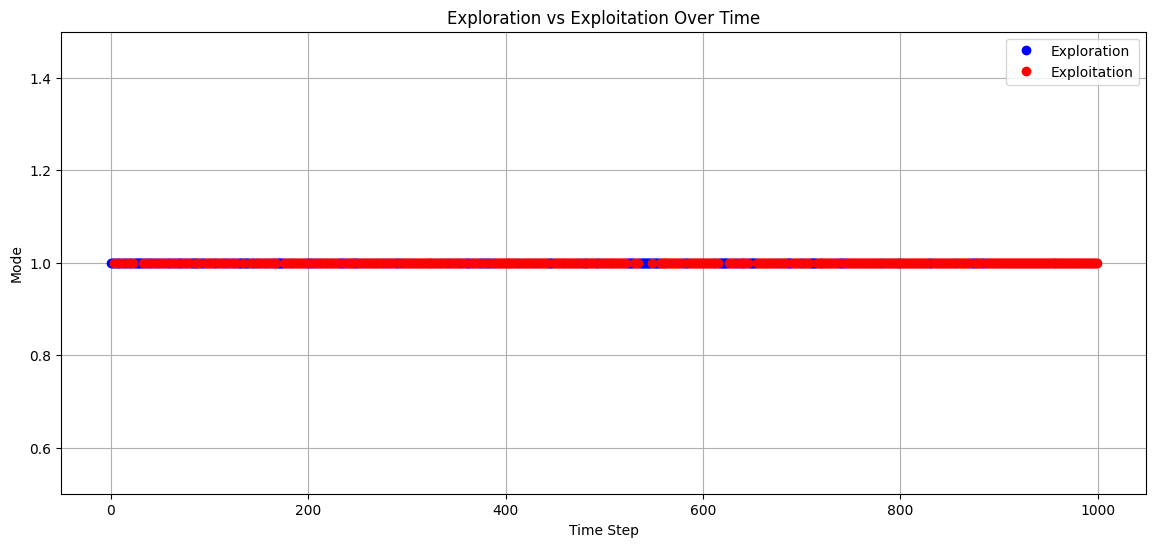

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the probabilities of reward for each arm
true_probabilities = [0.3, 0.5, 0.7]

# Function to simulate pulling an arm
def pull_arm(arm):
    return np.random.rand() < true_probabilities[arm]

# UCB strategy function with logging and plotting for exploration vs. exploitation
def ucb_strategy_with_logging_and_plotting(num_arms, num_pulls, c=2):
    estimated_values = np.zeros(num_arms)  # Estimated values of each arm
    num_times_pulled = np.zeros(num_arms)  # Number of times each arm has been pulled
    total_rewards = np.zeros(num_pulls)  # Total rewards at each step
    transitions = []  # Log of transitions (selected arm and reward)
    exploration_exploitation = []  # Log whether exploration or exploitation was done

    # Initial exploration: pull each arm once
    for arm in range(num_arms):
        reward = pull_arm(arm)
        estimated_values[arm] = reward
        num_times_pulled[arm] = 1
        total_rewards[arm] = reward
        transitions.append((arm, reward, estimated_values.copy(), num_times_pulled.copy()))
        exploration_exploitation.append("Exploration")
        print(f"Round {arm+1}: Selected Arm = {arm}, Reward = {reward}, Mode = Exploration")
        print(f"Estimated Values: {estimated_values}")
        print(f"Number of Times Each Arm Was Pulled: {num_times_pulled}\n")

    # Continue pulling arms based on UCB strategy
    for t in range(num_arms, num_pulls):
        ucb_values = estimated_values + c * np.sqrt(np.log(t + 1) / num_times_pulled)
        best_arm = np.argmax(ucb_values)
        reward = pull_arm(best_arm)
        num_times_pulled[best_arm] += 1
        estimated_values[best_arm] += (reward - estimated_values[best_arm]) / num_times_pulled[best_arm]
        total_rewards[t] = total_rewards[t - 1] + reward
        transitions.append((best_arm, reward, estimated_values.copy(), num_times_pulled.copy()))

        # Determine if the choice was exploration or exploitation
        if best_arm == np.argmax(estimated_values):
            exploration_exploitation.append("Exploitation")
        else:
            exploration_exploitation.append("Exploration")

        print(f"Round {t+1}: Selected Arm = {best_arm}, Reward = {reward}, Mode = {exploration_exploitation[-1]}")
        print(f"Estimated Values: {estimated_values}")
        print(f"Number of Times Each Arm Was Pulled: {num_times_pulled}\n")

    return estimated_values, num_times_pulled, total_rewards, transitions, exploration_exploitation

# Run a single experiment to see the detailed output
num_arms = len(true_probabilities)
num_pulls = 1000  # Increased for better visualization of trends

print("UCB Strategy:\n")
ucb_estimated_values, ucb_num_times_pulled, ucb_total_rewards, ucb_transitions, exploration_exploitation = ucb_strategy_with_logging_and_plotting(num_arms, num_pulls)
print("Final Estimated Values:", ucb_estimated_values)
print("Final Number of Times Each Arm Was Pulled:", ucb_num_times_pulled)

# Extract data for plotting
times = np.arange(num_pulls)
estimated_values_over_time = np.array([transition[2] for transition in ucb_transitions])
num_times_pulled_over_time = np.array([transition[3] for transition in ucb_transitions])
ucb_values_over_time = estimated_values_over_time + 2 * np.sqrt(np.log(times[:, None] + 1) / np.maximum(1, num_times_pulled_over_time))

# Plot the estimated values over time
plt.figure(figsize=(14, 6))
for arm in range(num_arms):
    plt.plot(times, estimated_values_over_time[:, arm], label=f'Estimated Value of Arm {arm}')
plt.xlabel('Time Step')
plt.ylabel('Estimated Value')
plt.title('Estimated Values Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Plot the number of times each arm has been pulled over time
plt.figure(figsize=(14, 6))
for arm in range(num_arms):
    plt.plot(times, num_times_pulled_over_time[:, arm], label=f'Number of Pulls of Arm {arm}')
plt.xlabel('Time Step')
plt.ylabel('Number of Pulls')
plt.title('Number of Times Each Arm Has Been Pulled Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Plot the upper confidence bounds over time
plt.figure(figsize=(14, 6))
for arm in range(num_arms):
    plt.plot(times, ucb_values_over_time[:, arm], label=f'UCB of Arm {arm}')
plt.xlabel('Time Step')
plt.ylabel('Upper Confidence Bound')
plt.title('Upper Confidence Bounds Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Plot the cumulative rewards over time
plt.figure(figsize=(14, 6))
plt.plot(times, ucb_total_rewards, label='Cumulative Rewards')
plt.xlabel('Time Step')
plt.ylabel('Cumulative Rewards')
plt.title('Cumulative Rewards Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Plot exploration vs exploitation over time
plt.figure(figsize=(14, 6))
exploration_times = [i for i in range(len(exploration_exploitation)) if exploration_exploitation[i] == "Exploration"]
exploitation_times = [i for i in range(len(exploration_exploitation)) if exploration_exploitation[i] == "Exploitation"]
plt.plot(exploration_times, np.ones(len(exploration_times)), 'bo', label='Exploration')
plt.plot(exploitation_times, np.ones(len(exploitation_times)), 'ro', label='Exploitation')
plt.ylim(0.5, 1.5)
plt.xlabel('Time Step')
plt.ylabel('Mode')
plt.title('Exploration vs Exploitation Over Time')
plt.legend()
plt.grid(True)
plt.show()


Varying epsilon

Streaming output truncated to the last 5000 lines.
Number of Times Each Arm Was Pulled: [19. 14. 18.]

Round 52: Selected Arm = 1, Reward = False
Estimated Values: [0.15789474 0.66666667 0.72222222]
Number of Times Each Arm Was Pulled: [19. 15. 18.]

Round 53: Selected Arm = 2, Reward = True
Estimated Values: [0.15789474 0.66666667 0.73684211]
Number of Times Each Arm Was Pulled: [19. 15. 19.]

Round 54: Selected Arm = 2, Reward = True
Estimated Values: [0.15789474 0.66666667 0.75      ]
Number of Times Each Arm Was Pulled: [19. 15. 20.]

Round 55: Selected Arm = 2, Reward = False
Estimated Values: [0.15789474 0.66666667 0.71428571]
Number of Times Each Arm Was Pulled: [19. 15. 21.]

Round 56: Selected Arm = 2, Reward = False
Estimated Values: [0.15789474 0.66666667 0.68181818]
Number of Times Each Arm Was Pulled: [19. 15. 22.]

Round 57: Selected Arm = 2, Reward = False
Estimated Values: [0.15789474 0.66666667 0.65217391]
Number of Times Each Arm Was Pulled: [19. 15. 23.]

Round 58: S

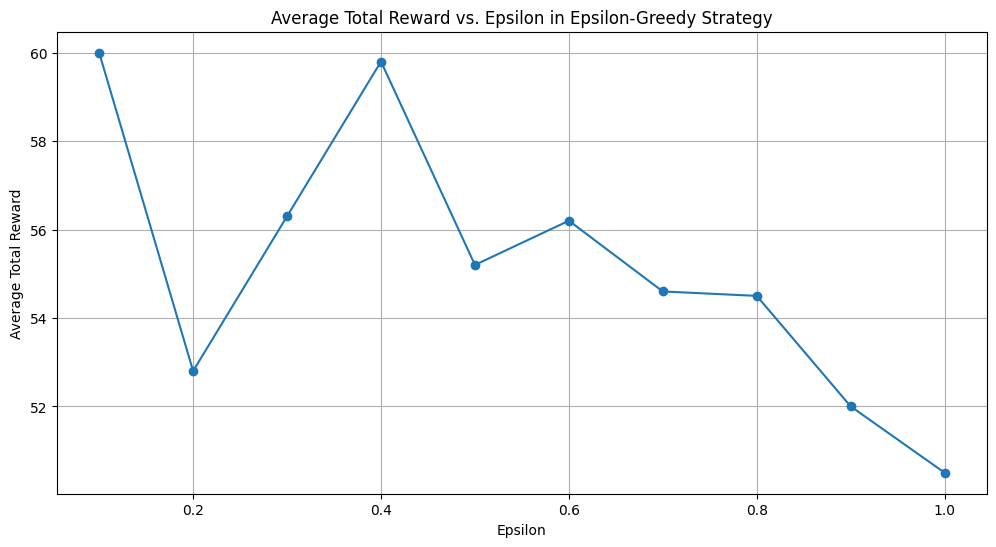

Round 1: Selected Arm = 0, Reward = True
Estimated Values: [1. 0. 0.]
Number of Times Each Arm Was Pulled: [1. 0. 0.]

Round 2: Selected Arm = 1, Reward = False
Estimated Values: [1. 0. 0.]
Number of Times Each Arm Was Pulled: [1. 1. 0.]

Round 3: Selected Arm = 2, Reward = True
Estimated Values: [1. 0. 1.]
Number of Times Each Arm Was Pulled: [1. 1. 1.]

Round 4: Selected Arm = 2, Reward = True
Estimated Values: [1. 0. 1.]
Number of Times Each Arm Was Pulled: [1. 1. 2.]

Round 5: Selected Arm = 0, Reward = False
Estimated Values: [0.5 0.  1. ]
Number of Times Each Arm Was Pulled: [2. 1. 2.]

Round 6: Selected Arm = 2, Reward = True
Estimated Values: [0.5 0.  1. ]
Number of Times Each Arm Was Pulled: [2. 1. 3.]

Round 7: Selected Arm = 2, Reward = False
Estimated Values: [0.5  0.   0.75]
Number of Times Each Arm Was Pulled: [2. 1. 4.]

Round 8: Selected Arm = 0, Reward = True
Estimated Values: [0.66666667 0.         0.75      ]
Number of Times Each Arm Was Pulled: [3. 1. 4.]

Round 9: 

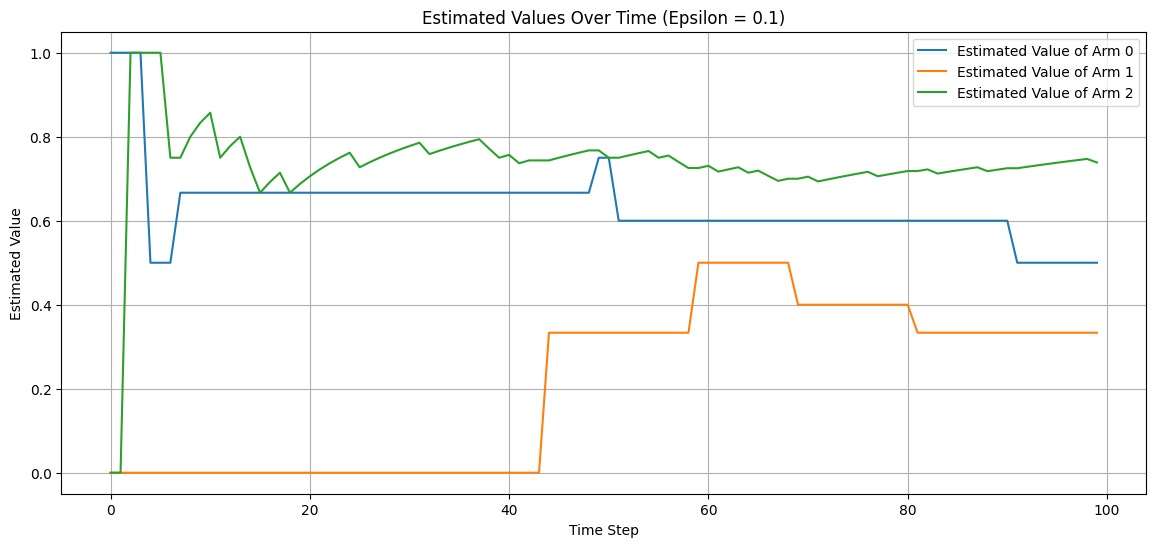

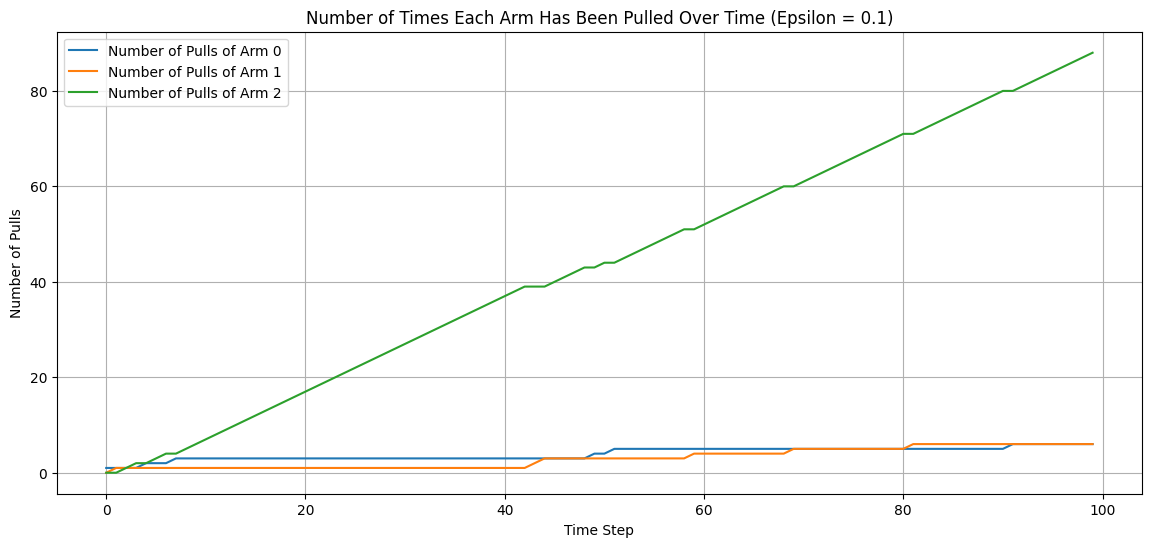

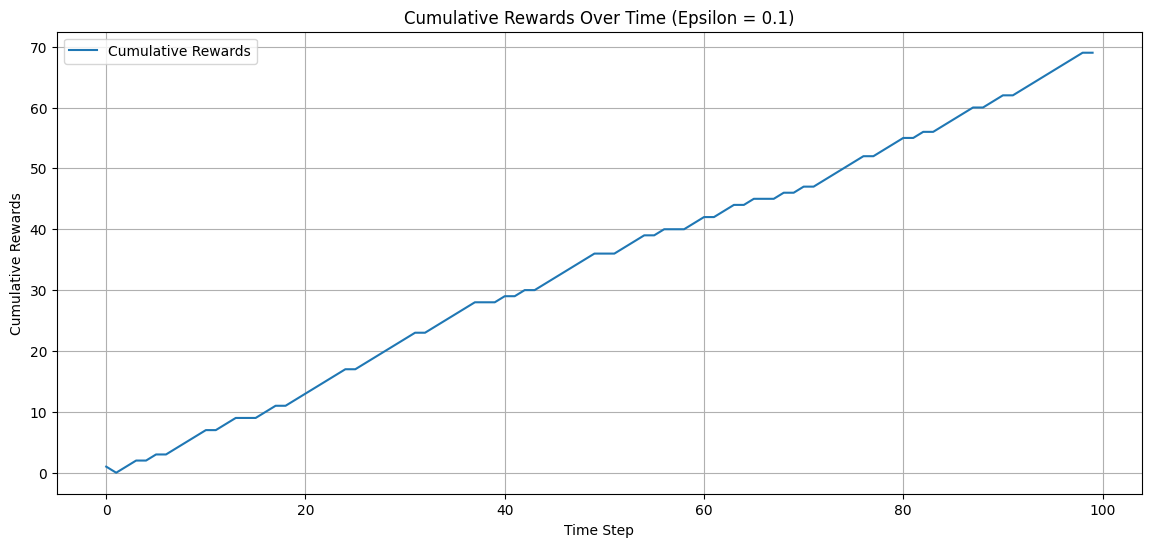

Round 1: Selected Arm = 0, Reward = True
Estimated Values: [1. 0. 0.]
Number of Times Each Arm Was Pulled: [1. 0. 0.]

Round 2: Selected Arm = 1, Reward = True
Estimated Values: [1. 1. 0.]
Number of Times Each Arm Was Pulled: [1. 1. 0.]

Round 3: Selected Arm = 2, Reward = True
Estimated Values: [1. 1. 1.]
Number of Times Each Arm Was Pulled: [1. 1. 1.]

Round 4: Selected Arm = 1, Reward = True
Estimated Values: [1. 1. 1.]
Number of Times Each Arm Was Pulled: [1. 2. 1.]

Round 5: Selected Arm = 2, Reward = True
Estimated Values: [1. 1. 1.]
Number of Times Each Arm Was Pulled: [1. 2. 2.]

Round 6: Selected Arm = 1, Reward = False
Estimated Values: [1.         0.66666667 1.        ]
Number of Times Each Arm Was Pulled: [1. 3. 2.]

Round 7: Selected Arm = 0, Reward = False
Estimated Values: [0.5        0.66666667 1.        ]
Number of Times Each Arm Was Pulled: [2. 3. 2.]

Round 8: Selected Arm = 0, Reward = False
Estimated Values: [0.33333333 0.66666667 1.        ]
Number of Times Each A

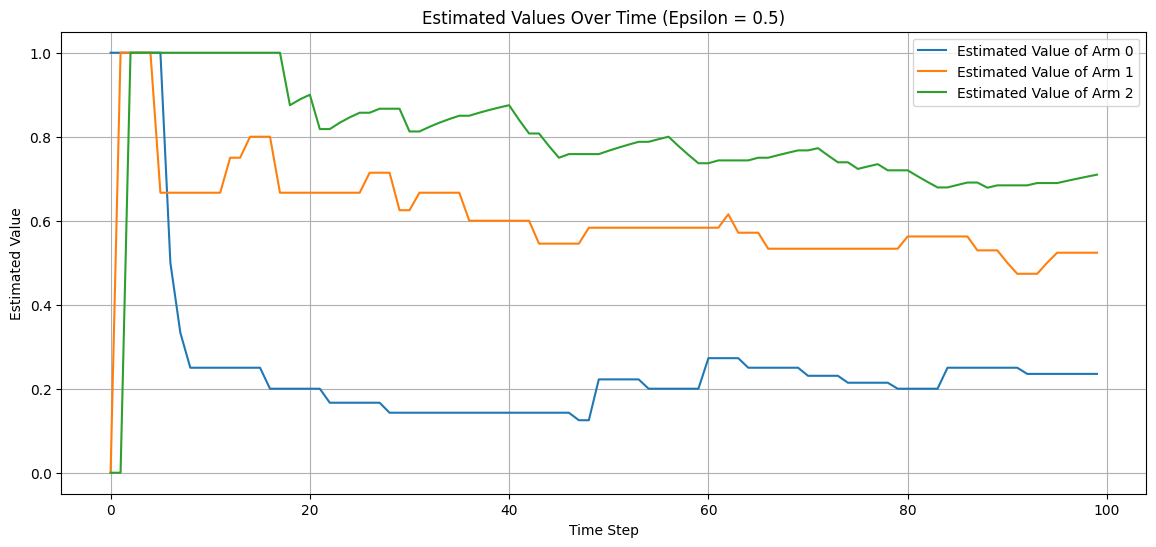

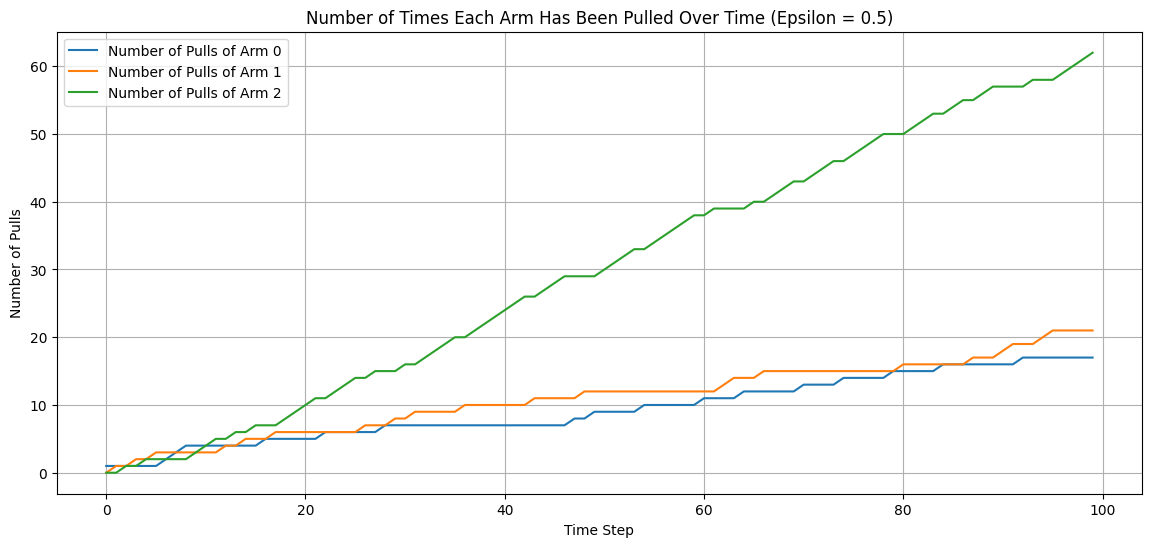

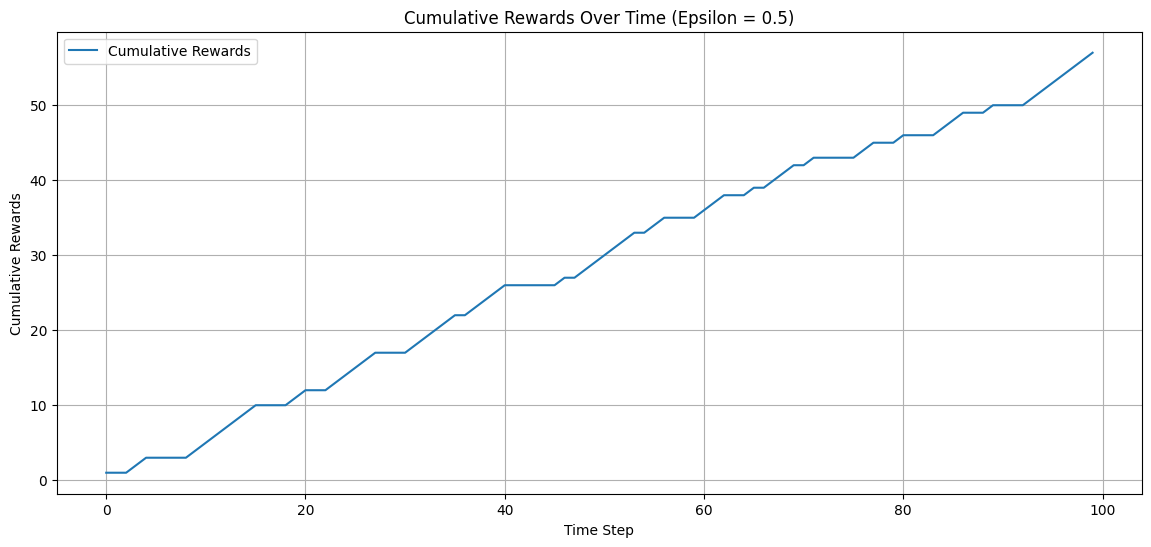

Round 1: Selected Arm = 0, Reward = False
Estimated Values: [0. 0. 0.]
Number of Times Each Arm Was Pulled: [1. 0. 0.]

Round 2: Selected Arm = 1, Reward = False
Estimated Values: [0. 0. 0.]
Number of Times Each Arm Was Pulled: [1. 1. 0.]

Round 3: Selected Arm = 2, Reward = True
Estimated Values: [0. 0. 1.]
Number of Times Each Arm Was Pulled: [1. 1. 1.]

Round 4: Selected Arm = 0, Reward = False
Estimated Values: [0. 0. 1.]
Number of Times Each Arm Was Pulled: [2. 1. 1.]

Round 5: Selected Arm = 0, Reward = False
Estimated Values: [0. 0. 1.]
Number of Times Each Arm Was Pulled: [3. 1. 1.]

Round 6: Selected Arm = 1, Reward = True
Estimated Values: [0.  0.5 1. ]
Number of Times Each Arm Was Pulled: [3. 2. 1.]

Round 7: Selected Arm = 1, Reward = False
Estimated Values: [0.         0.33333333 1.        ]
Number of Times Each Arm Was Pulled: [3. 3. 1.]

Round 8: Selected Arm = 0, Reward = False
Estimated Values: [0.         0.33333333 1.        ]
Number of Times Each Arm Was Pulled: [4.

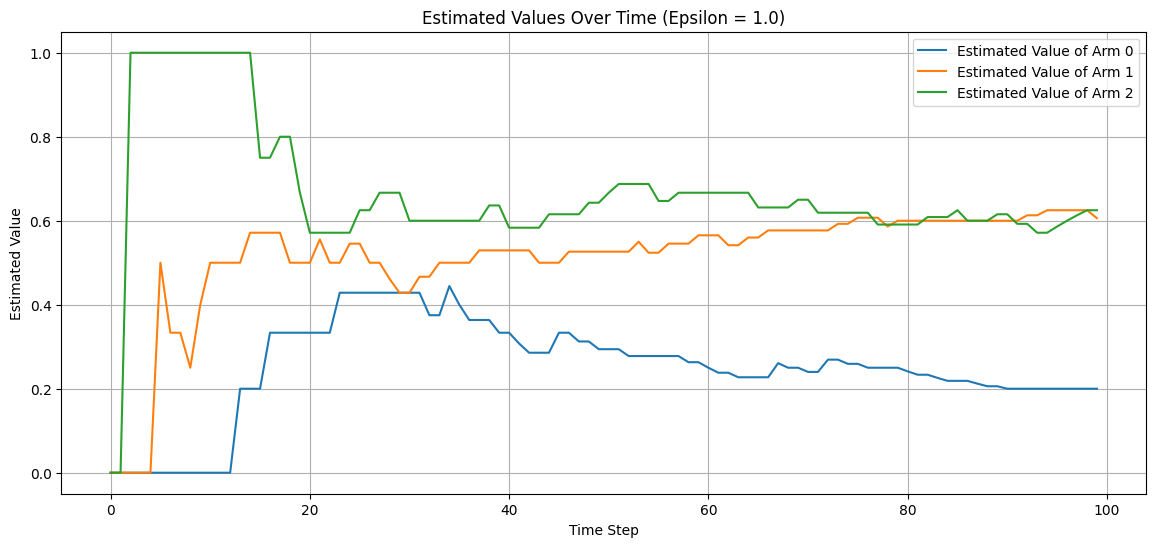

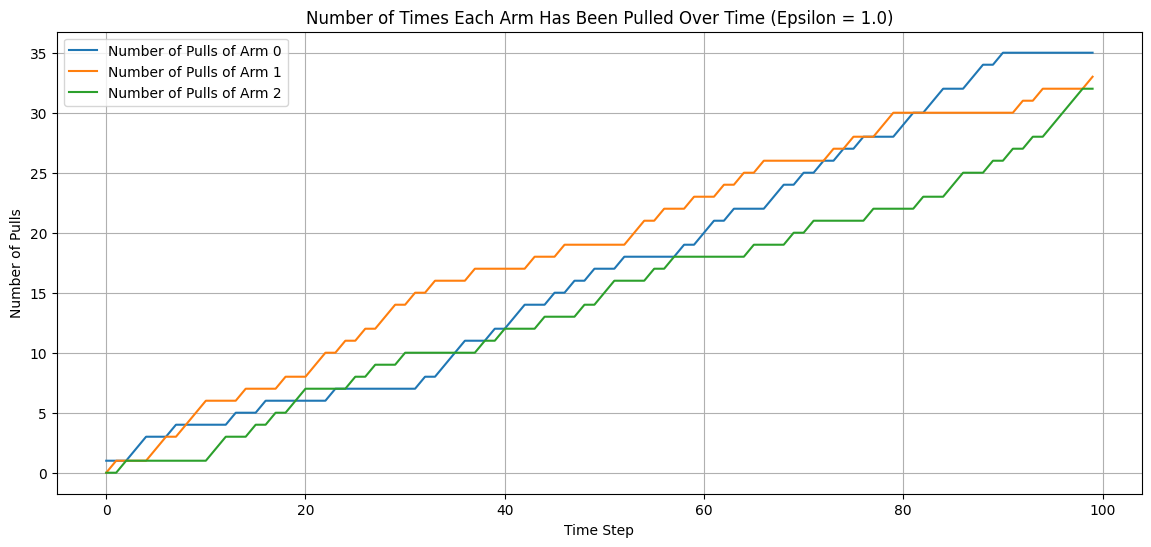

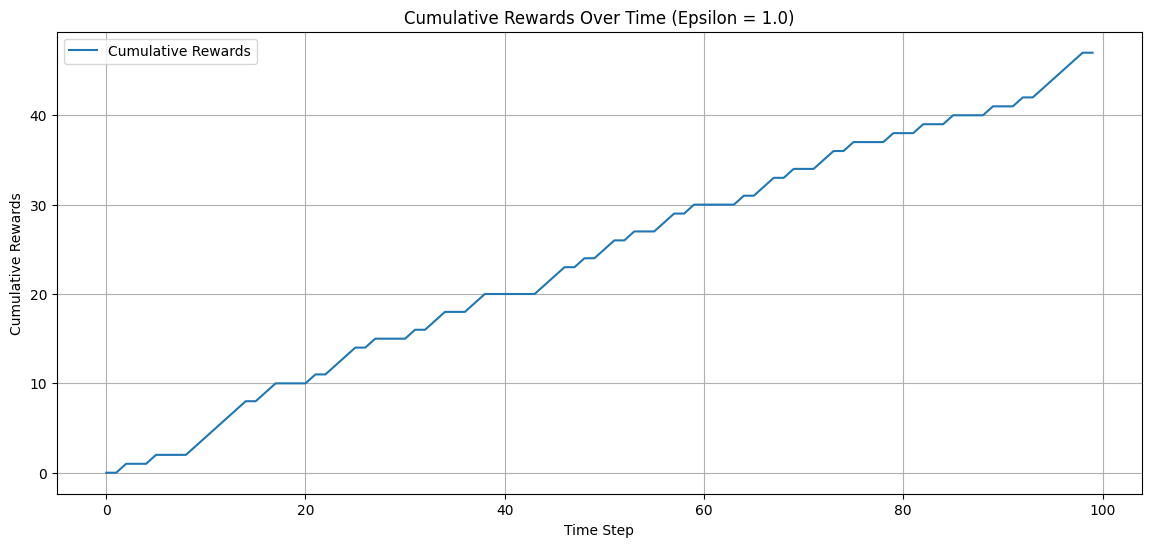

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define the probabilities of reward for each arm
true_probabilities = [0.3, 0.5, 0.7]

# Function to simulate pulling an arm
def pull_arm(arm):
    return np.random.rand() < true_probabilities[arm]

# Epsilon-greedy strategy function with logging
def epsilon_greedy_strategy_with_logging(num_arms, num_pulls, epsilon):
    estimated_values = np.zeros(num_arms)  # Estimated values of each arm
    num_times_pulled = np.zeros(num_arms)  # Number of times each arm has been pulled
    total_rewards = np.zeros(num_pulls)  # Total rewards at each step
    transitions = []  # Log of transitions (selected arm and reward)

    # Initial exploration: pull each arm once
    for arm in range(num_arms):
        reward = pull_arm(arm)
        estimated_values[arm] = reward
        num_times_pulled[arm] = 1
        total_rewards[arm] = reward
        transitions.append((arm, reward, estimated_values.copy(), num_times_pulled.copy()))
        print(f"Round {arm+1}: Selected Arm = {arm}, Reward = {reward}")
        print(f"Estimated Values: {estimated_values}")
        print(f"Number of Times Each Arm Was Pulled: {num_times_pulled}\n")

    # Continue pulling arms based on epsilon-greedy strategy
    for t in range(num_arms, num_pulls):
        if np.random.rand() < epsilon:
            chosen_arm = np.random.choice(num_arms)  # Explore: choose a random arm
        else:
            chosen_arm = np.argmax(estimated_values)  # Exploit: choose the best arm

        reward = pull_arm(chosen_arm)
        num_times_pulled[chosen_arm] += 1
        estimated_values[chosen_arm] += (reward - estimated_values[chosen_arm]) / num_times_pulled[chosen_arm]
        total_rewards[t] = total_rewards[t - 1] + reward
        transitions.append((chosen_arm, reward, estimated_values.copy(), num_times_pulled.copy()))
        print(f"Round {t+1}: Selected Arm = {chosen_arm}, Reward = {reward}")
        print(f"Estimated Values: {estimated_values}")
        print(f"Number of Times Each Arm Was Pulled: {num_times_pulled}\n")

    return estimated_values, num_times_pulled, total_rewards, transitions

# Run experiments with varying epsilon values
epsilon_values = np.arange(0.1, 1.1, 0.1)
num_experiments = 10
num_pulls = 100
num_arms = len(true_probabilities)

average_rewards = []

for epsilon in epsilon_values:
    print(f"Running experiments with epsilon = {epsilon}\n")
    total_rewards_per_experiment = np.zeros(num_experiments)
    for i in range(num_experiments):
        _, _, total_rewards, _ = epsilon_greedy_strategy_with_logging(num_arms, num_pulls, epsilon)
        total_rewards_per_experiment[i] = total_rewards[-1]
    average_rewards.append(np.mean(total_rewards_per_experiment))

# Plot average rewards for different epsilon values
plt.figure(figsize=(12, 6))
plt.plot(epsilon_values, average_rewards, marker='o')
plt.xlabel('Epsilon')
plt.ylabel('Average Total Reward')
plt.title('Average Total Reward vs. Epsilon in Epsilon-Greedy Strategy')
plt.grid(True)
plt.show()

# Additional plots for a specific epsilon value (e.g., epsilon = 0.1, 0.5, 1.0)
def plot_results_for_epsilon(epsilon):
    _, num_times_pulled, total_rewards, transitions = epsilon_greedy_strategy_with_logging(num_arms, num_pulls, epsilon)

    times = np.arange(num_pulls)
    estimated_values_over_time = np.array([transition[2] for transition in transitions])
    num_times_pulled_over_time = np.array([transition[3] for transition in transitions])

    # Plot the estimated values over time
    plt.figure(figsize=(14, 6))
    for arm in range(num_arms):
        plt.plot(times, estimated_values_over_time[:, arm], label=f'Estimated Value of Arm {arm}')
    plt.xlabel('Time Step')
    plt.ylabel('Estimated Value')
    plt.title(f'Estimated Values Over Time (Epsilon = {epsilon})')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot the number of times each arm has been pulled over time
    plt.figure(figsize=(14, 6))
    for arm in range(num_arms):
        plt.plot(times, num_times_pulled_over_time[:, arm], label=f'Number of Pulls of Arm {arm}')
    plt.xlabel('Time Step')
    plt.ylabel('Number of Pulls')
    plt.title(f'Number of Times Each Arm Has Been Pulled Over Time (Epsilon = {epsilon})')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot the cumulative rewards over time
    plt.figure(figsize=(14, 6))
    plt.plot(times, total_rewards, label='Cumulative Rewards')
    plt.xlabel('Time Step')
    plt.ylabel('Cumulative Rewards')
    plt.title(f'Cumulative Rewards Over Time (Epsilon = {epsilon})')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example plots for specific epsilon values
plot_results_for_epsilon(0.1)
plot_results_for_epsilon(0.5)
plot_results_for_epsilon(1.0)


Softmax Strategy

Running experiments with tau = 0.1

Round 1: Selected Arm = 0, Reward = True
Estimated Values: [1. 0. 0.]
Number of Times Each Arm Was Pulled: [1. 0. 0.]

Round 2: Selected Arm = 1, Reward = False
Estimated Values: [1. 0. 0.]
Number of Times Each Arm Was Pulled: [1. 1. 0.]

Round 3: Selected Arm = 2, Reward = True
Estimated Values: [1. 0. 1.]
Number of Times Each Arm Was Pulled: [1. 1. 1.]

Round 4: Selected Arm = 0, Reward = True
Estimated Values: [1. 0. 1.]
Number of Times Each Arm Was Pulled: [2. 1. 1.]

Round 5: Selected Arm = 2, Reward = False
Estimated Values: [1.  0.  0.5]
Number of Times Each Arm Was Pulled: [2. 1. 2.]

Round 6: Selected Arm = 0, Reward = False
Estimated Values: [0.66666667 0.         0.5       ]
Number of Times Each Arm Was Pulled: [3. 1. 2.]

Round 7: Selected Arm = 0, Reward = False
Estimated Values: [0.5 0.  0.5]
Number of Times Each Arm Was Pulled: [4. 1. 2.]

Round 8: Selected Arm = 0, Reward = True
Estimated Values: [0.6 0.  0.5]
Number of Times Each Arm

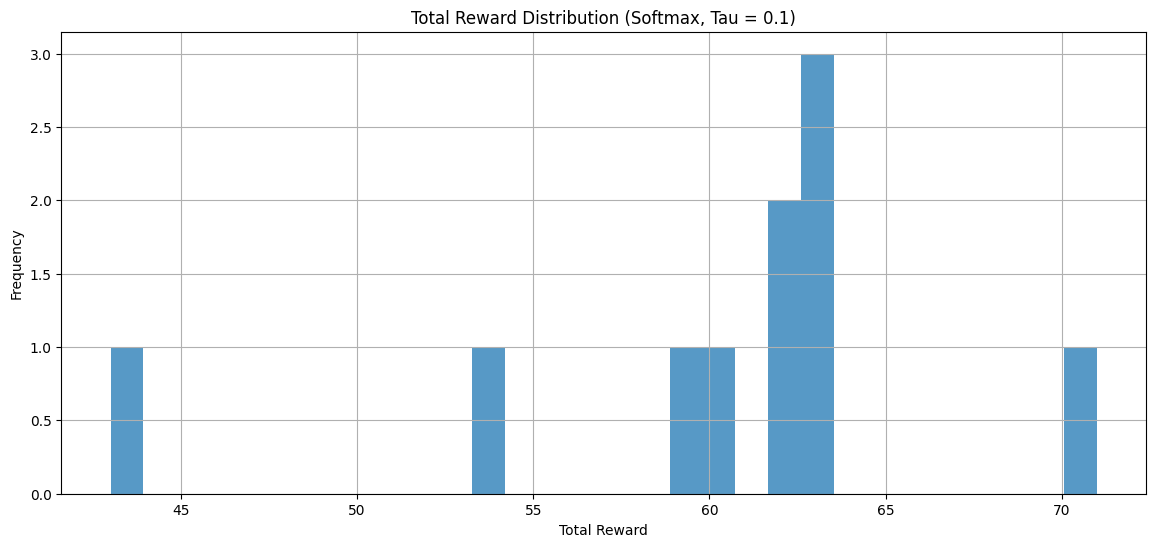

Round 1: Selected Arm = 0, Reward = False
Estimated Values: [0. 0. 0.]
Number of Times Each Arm Was Pulled: [1. 0. 0.]

Round 2: Selected Arm = 1, Reward = True
Estimated Values: [0. 1. 0.]
Number of Times Each Arm Was Pulled: [1. 1. 0.]

Round 3: Selected Arm = 2, Reward = True
Estimated Values: [0. 1. 1.]
Number of Times Each Arm Was Pulled: [1. 1. 1.]

Round 4: Selected Arm = 2, Reward = True
Estimated Values: [0. 1. 1.]
Number of Times Each Arm Was Pulled: [1. 1. 2.]

Round 5: Selected Arm = 1, Reward = True
Estimated Values: [0. 1. 1.]
Number of Times Each Arm Was Pulled: [1. 2. 2.]

Round 6: Selected Arm = 1, Reward = False
Estimated Values: [0.         0.66666667 1.        ]
Number of Times Each Arm Was Pulled: [1. 3. 2.]

Round 7: Selected Arm = 2, Reward = False
Estimated Values: [0.         0.66666667 0.66666667]
Number of Times Each Arm Was Pulled: [1. 3. 3.]

Round 8: Selected Arm = 1, Reward = False
Estimated Values: [0.         0.5        0.66666667]
Number of Times Each 

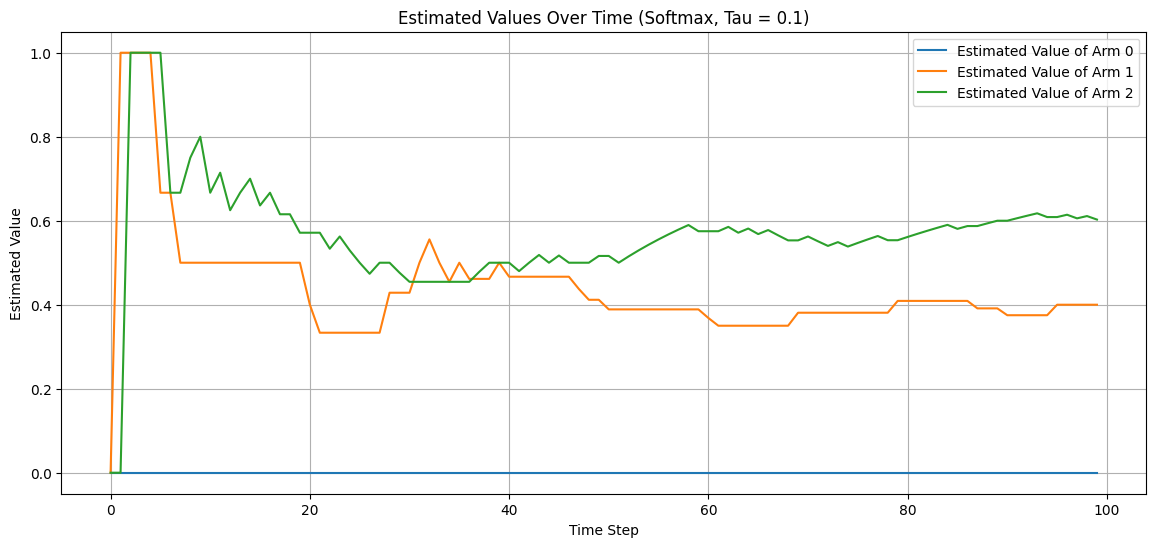

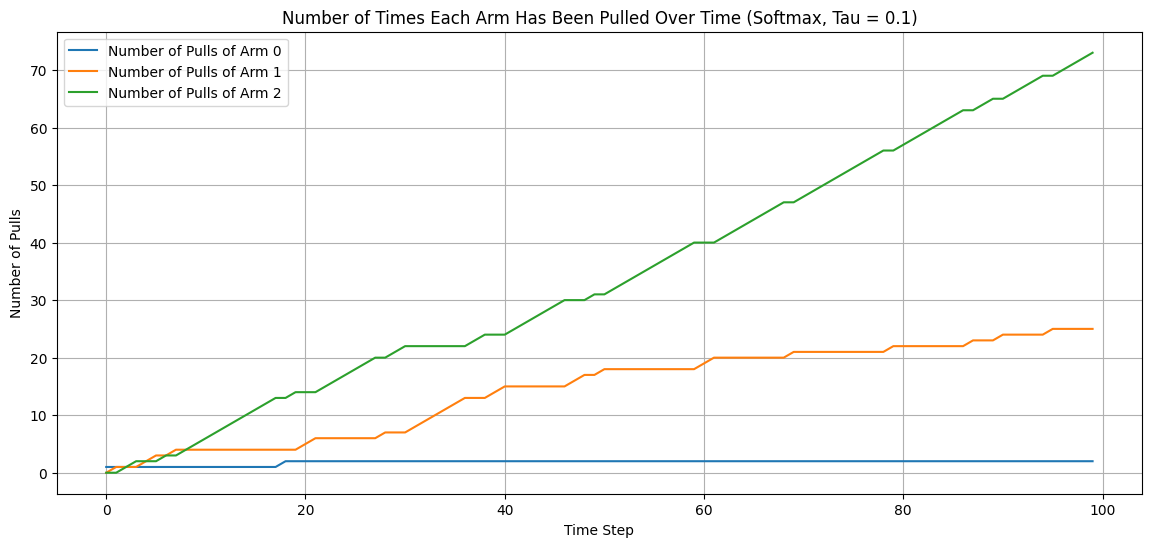

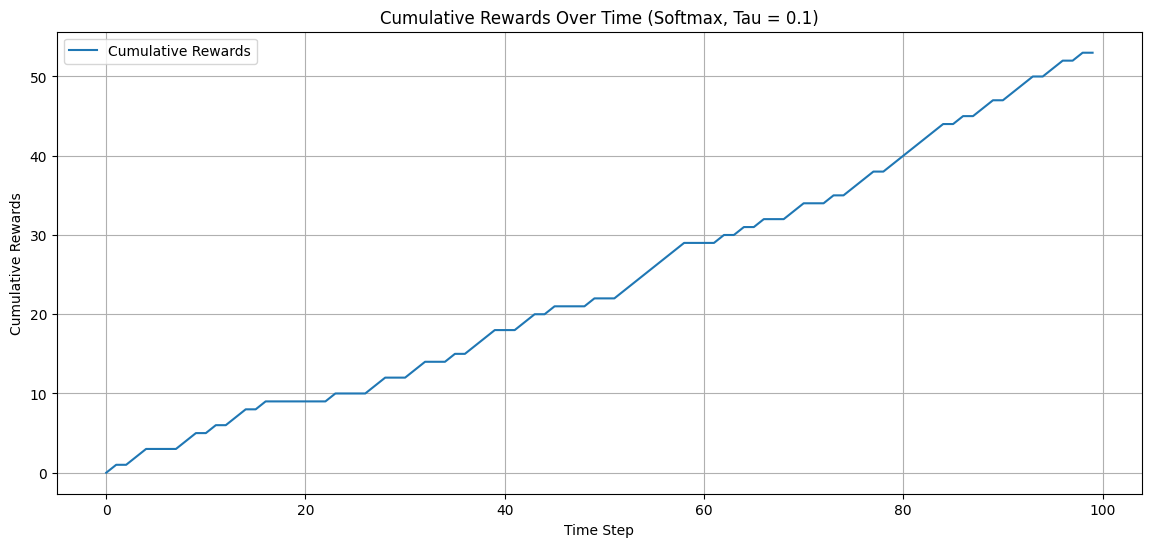

Running experiments with tau = 0.5

Round 1: Selected Arm = 0, Reward = False
Estimated Values: [0. 0. 0.]
Number of Times Each Arm Was Pulled: [1. 0. 0.]

Round 2: Selected Arm = 1, Reward = False
Estimated Values: [0. 0. 0.]
Number of Times Each Arm Was Pulled: [1. 1. 0.]

Round 3: Selected Arm = 2, Reward = True
Estimated Values: [0. 0. 1.]
Number of Times Each Arm Was Pulled: [1. 1. 1.]

Round 4: Selected Arm = 2, Reward = True
Estimated Values: [0. 0. 1.]
Number of Times Each Arm Was Pulled: [1. 1. 2.]

Round 5: Selected Arm = 2, Reward = True
Estimated Values: [0. 0. 1.]
Number of Times Each Arm Was Pulled: [1. 1. 3.]

Round 6: Selected Arm = 2, Reward = False
Estimated Values: [0.   0.   0.75]
Number of Times Each Arm Was Pulled: [1. 1. 4.]

Round 7: Selected Arm = 2, Reward = False
Estimated Values: [0.  0.  0.6]
Number of Times Each Arm Was Pulled: [1. 1. 5.]

Round 8: Selected Arm = 2, Reward = True
Estimated Values: [0.         0.         0.66666667]
Number of Times Each Arm

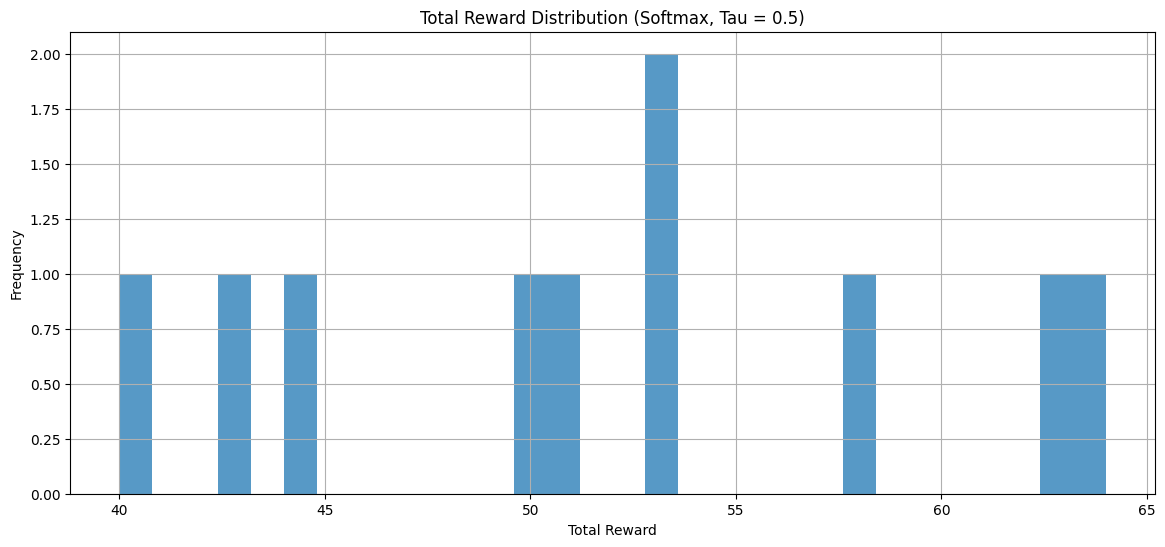

Round 1: Selected Arm = 0, Reward = False
Estimated Values: [0. 0. 0.]
Number of Times Each Arm Was Pulled: [1. 0. 0.]

Round 2: Selected Arm = 1, Reward = True
Estimated Values: [0. 1. 0.]
Number of Times Each Arm Was Pulled: [1. 1. 0.]

Round 3: Selected Arm = 2, Reward = True
Estimated Values: [0. 1. 1.]
Number of Times Each Arm Was Pulled: [1. 1. 1.]

Round 4: Selected Arm = 1, Reward = False
Estimated Values: [0.  0.5 1. ]
Number of Times Each Arm Was Pulled: [1. 2. 1.]

Round 5: Selected Arm = 2, Reward = True
Estimated Values: [0.  0.5 1. ]
Number of Times Each Arm Was Pulled: [1. 2. 2.]

Round 6: Selected Arm = 1, Reward = False
Estimated Values: [0.         0.33333333 1.        ]
Number of Times Each Arm Was Pulled: [1. 3. 2.]

Round 7: Selected Arm = 2, Reward = True
Estimated Values: [0.         0.33333333 1.        ]
Number of Times Each Arm Was Pulled: [1. 3. 3.]

Round 8: Selected Arm = 2, Reward = True
Estimated Values: [0.         0.33333333 1.        ]
Number of Times 

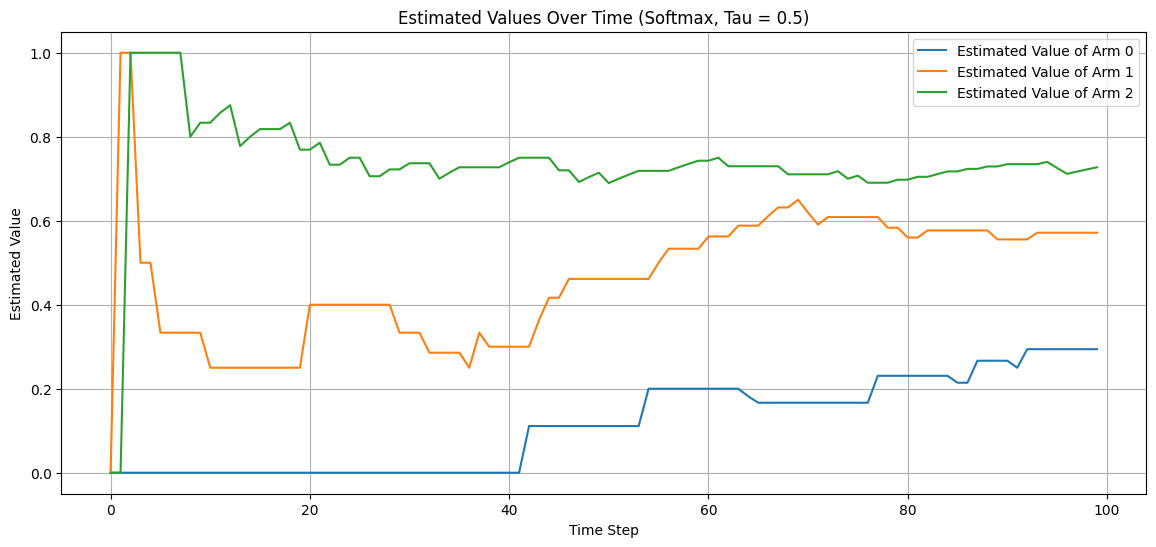

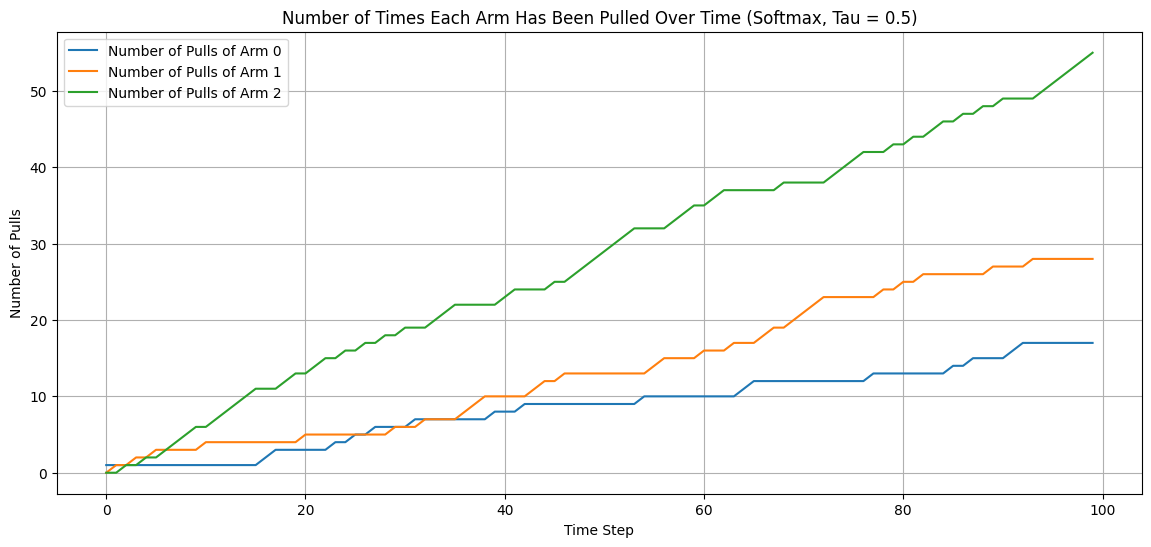

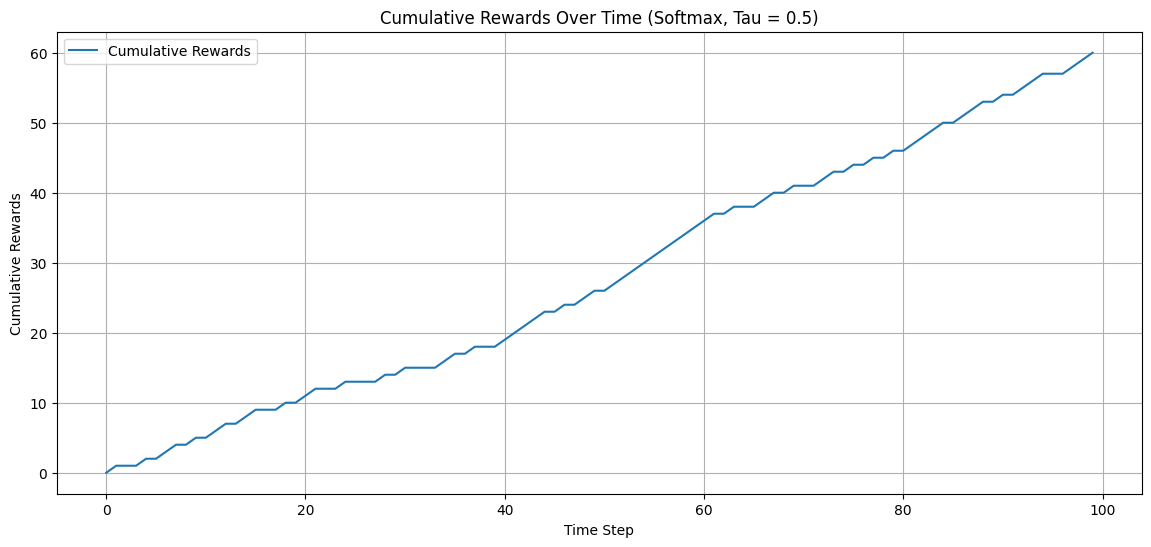

Running experiments with tau = 1.0

Round 1: Selected Arm = 0, Reward = True
Estimated Values: [1. 0. 0.]
Number of Times Each Arm Was Pulled: [1. 0. 0.]

Round 2: Selected Arm = 1, Reward = True
Estimated Values: [1. 1. 0.]
Number of Times Each Arm Was Pulled: [1. 1. 0.]

Round 3: Selected Arm = 2, Reward = False
Estimated Values: [1. 1. 0.]
Number of Times Each Arm Was Pulled: [1. 1. 1.]

Round 4: Selected Arm = 1, Reward = True
Estimated Values: [1. 1. 0.]
Number of Times Each Arm Was Pulled: [1. 2. 1.]

Round 5: Selected Arm = 1, Reward = False
Estimated Values: [1.         0.66666667 0.        ]
Number of Times Each Arm Was Pulled: [1. 3. 1.]

Round 6: Selected Arm = 2, Reward = True
Estimated Values: [1.         0.66666667 0.5       ]
Number of Times Each Arm Was Pulled: [1. 3. 2.]

Round 7: Selected Arm = 1, Reward = False
Estimated Values: [1.  0.5 0.5]
Number of Times Each Arm Was Pulled: [1. 4. 2.]

Round 8: Selected Arm = 0, Reward = True
Estimated Values: [1.  0.5 0.5]
Numb

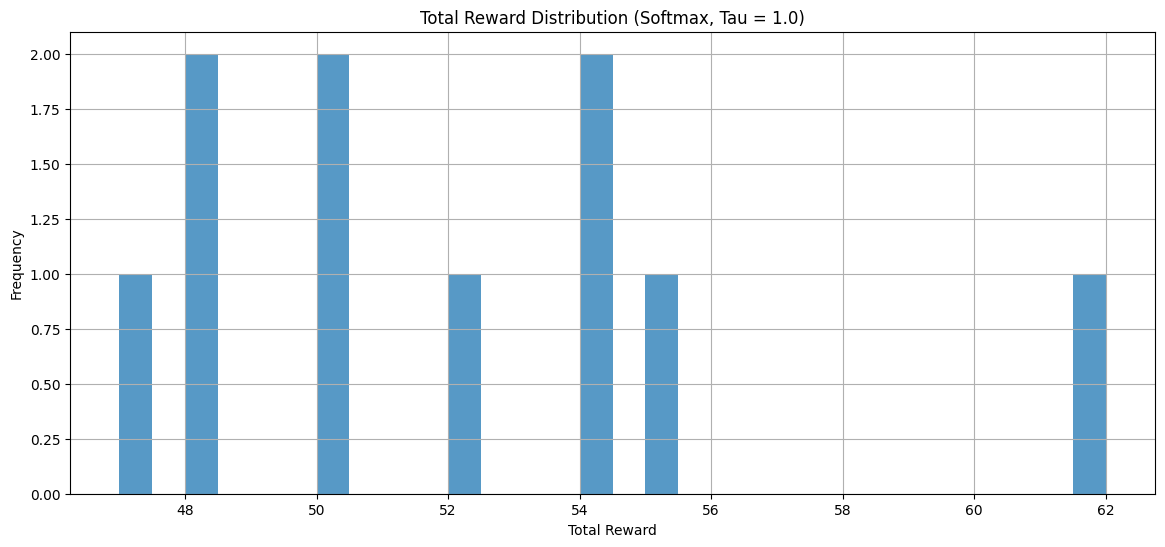

Round 1: Selected Arm = 0, Reward = True
Estimated Values: [1. 0. 0.]
Number of Times Each Arm Was Pulled: [1. 0. 0.]

Round 2: Selected Arm = 1, Reward = True
Estimated Values: [1. 1. 0.]
Number of Times Each Arm Was Pulled: [1. 1. 0.]

Round 3: Selected Arm = 2, Reward = True
Estimated Values: [1. 1. 1.]
Number of Times Each Arm Was Pulled: [1. 1. 1.]

Round 4: Selected Arm = 0, Reward = False
Estimated Values: [0.5 1.  1. ]
Number of Times Each Arm Was Pulled: [2. 1. 1.]

Round 5: Selected Arm = 0, Reward = True
Estimated Values: [0.66666667 1.         1.        ]
Number of Times Each Arm Was Pulled: [3. 1. 1.]

Round 6: Selected Arm = 0, Reward = False
Estimated Values: [0.5 1.  1. ]
Number of Times Each Arm Was Pulled: [4. 1. 1.]

Round 7: Selected Arm = 2, Reward = True
Estimated Values: [0.5 1.  1. ]
Number of Times Each Arm Was Pulled: [4. 1. 2.]

Round 8: Selected Arm = 0, Reward = False
Estimated Values: [0.4 1.  1. ]
Number of Times Each Arm Was Pulled: [5. 1. 2.]

Round 9: 

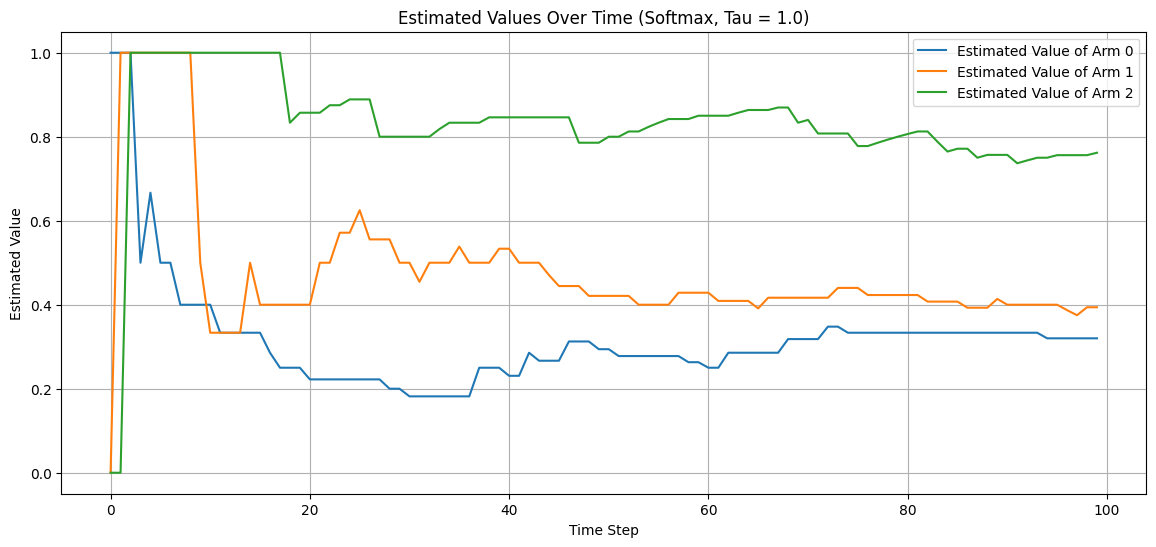

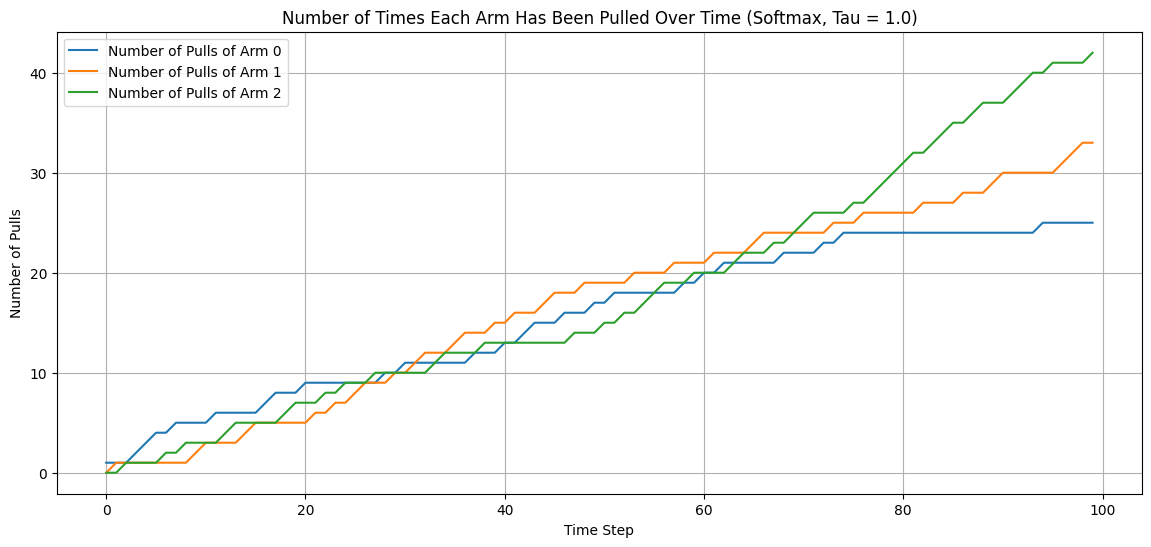

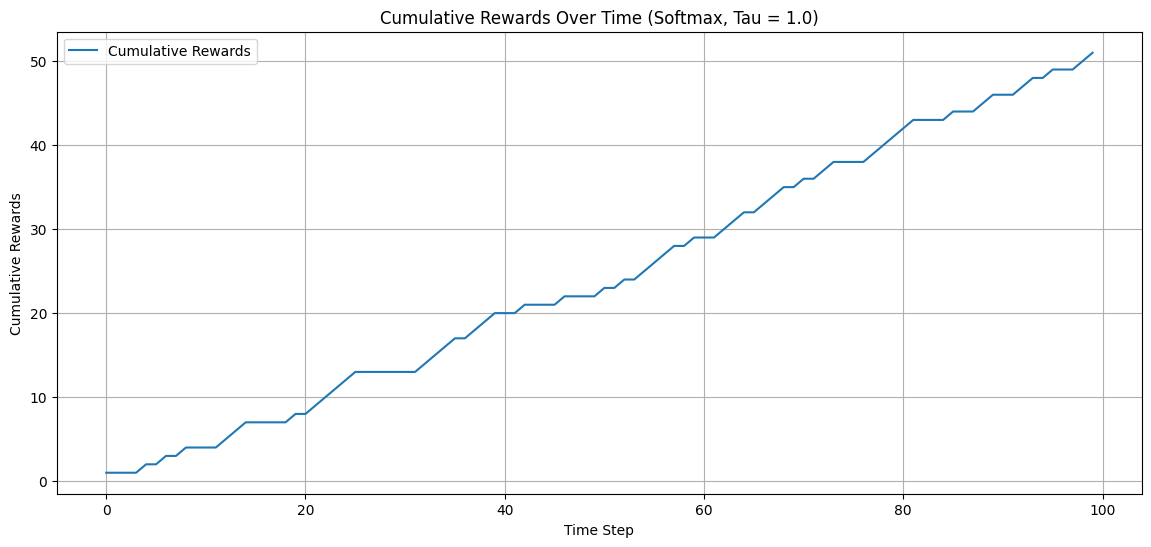

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Define the probabilities of reward for each arm
true_probabilities = [0.3, 0.5, 0.7]

# Function to simulate pulling an arm
def pull_arm(arm):
    return np.random.rand() < true_probabilities[arm]

# Softmax strategy function with logging
def softmax_strategy_with_logging(num_arms, num_pulls, tau):
    estimated_values = np.zeros(num_arms)  # Estimated values of each arm
    num_times_pulled = np.zeros(num_arms)  # Number of times each arm has been pulled
    total_rewards = np.zeros(num_pulls)  # Total rewards at each step
    transitions = []  # Log of transitions (selected arm and reward)

    def softmax(x):
        e_x = np.exp(x - np.max(x))  # Subtract max for numerical stability
        return e_x / e_x.sum()

    # Initial exploration: pull each arm once
    for arm in range(num_arms):
        reward = pull_arm(arm)
        estimated_values[arm] = reward
        num_times_pulled[arm] = 1
        total_rewards[arm] = reward
        transitions.append((arm, reward, estimated_values.copy(), num_times_pulled.copy()))
        print(f"Round {arm+1}: Selected Arm = {arm}, Reward = {reward}")
        print(f"Estimated Values: {estimated_values}")
        print(f"Number of Times Each Arm Was Pulled: {num_times_pulled}\n")

    # Continue pulling arms based on softmax strategy
    for t in range(num_arms, num_pulls):
        preferences = estimated_values / tau
        probabilities = softmax(preferences)
        chosen_arm = np.random.choice(num_arms, p=probabilities)
        reward = pull_arm(chosen_arm)
        num_times_pulled[chosen_arm] += 1
        estimated_values[chosen_arm] += (reward - estimated_values[chosen_arm]) / num_times_pulled[chosen_arm]
        total_rewards[t] = total_rewards[t - 1] + reward
        transitions.append((chosen_arm, reward, estimated_values.copy(), num_times_pulled.copy()))
        print(f"Round {t+1}: Selected Arm = {chosen_arm}, Reward = {reward}")
        print(f"Estimated Values: {estimated_values}")
        print(f"Number of Times Each Arm Was Pulled: {num_times_pulled}\n")

    return estimated_values, num_times_pulled, total_rewards, transitions

# Run experiments with varying temperature values
tau_values = [0.1, 0.5, 1.0]
num_experiments = 10
num_pulls = 100
num_arms = len(true_probabilities)

for tau in tau_values:
    print(f"Running experiments with tau = {tau}\n")
    total_rewards_per_experiment = np.zeros(num_experiments)
    for i in range(num_experiments):
        _, _, total_rewards, _ = softmax_strategy_with_logging(num_arms, num_pulls, tau)
        total_rewards_per_experiment[i] = total_rewards[-1]

    # Plot the results for this temperature value
    plt.figure(figsize=(14, 6))
    plt.hist(total_rewards_per_experiment, bins=30, alpha=0.75)
    plt.xlabel('Total Reward')
    plt.ylabel('Frequency')
    plt.title(f'Total Reward Distribution (Softmax, Tau = {tau})')
    plt.grid(True)
    plt.show()

    # Run a single experiment for detailed plots
    estimated_values, num_times_pulled, total_rewards, transitions = softmax_strategy_with_logging(num_arms, num_pulls, tau)
    times = np.arange(num_pulls)
    estimated_values_over_time = np.array([transition[2] for transition in transitions])
    num_times_pulled_over_time = np.array([transition[3] for transition in transitions])

    # Plot the estimated values over time
    plt.figure(figsize=(14, 6))
    for arm in range(num_arms):
        plt.plot(times, estimated_values_over_time[:, arm], label=f'Estimated Value of Arm {arm}')
    plt.xlabel('Time Step')
    plt.ylabel('Estimated Value')
    plt.title(f'Estimated Values Over Time (Softmax, Tau = {tau})')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot the number of times each arm has been pulled over time
    plt.figure(figsize=(14, 6))
    for arm in range(num_arms):
        plt.plot(times, num_times_pulled_over_time[:, arm], label=f'Number of Pulls of Arm {arm}')
    plt.xlabel('Time Step')
    plt.ylabel('Number of Pulls')
    plt.title(f'Number of Times Each Arm Has Been Pulled Over Time (Softmax, Tau = {tau})')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot the cumulative rewards over time
    plt.figure(figsize=(14, 6))
    plt.plot(times, total_rewards, label='Cumulative Rewards')
    plt.xlabel('Time Step')
    plt.ylabel('Cumulative Rewards')
    plt.title(f'Cumulative Rewards Over Time (Softmax, Tau = {tau})')
    plt.legend()
    plt.grid(True)
    plt.show()
